<a href="https://colab.research.google.com/github/rohitmallick-mr/credit-card-approval/blob/main/CREDIT_CARD_APPROVAL_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**


Credit card approval is a crucial process for banks as it determines whether a customer is eligible for a credit card or not. In today's world, where credit cards have become a widely used payment method, predicting credit card approval based on customer information is essential for banks to make informed decisions.

 **Aim:**
 > The aim of this project is to predict credit card approval based on various customer attributes such as Annual income, age, occupation, and Owner of property or own a car or not. By analyzing this data, we can identify patterns and trends that can help banks determine whether a customer is likely to be a good client and hence reduce the risk of default.

 T**he Importance of this project in today's world:**
  >  This project is important in today's world as it can help banks to streamline their credit card approval process and make it more efficient. By accurately predicting credit card approval, banks can avoid approving credit cards to customers who are likely to default, and hence minimize the risk of bad debt.

Predicting a good client is crucial for a bank as it directly impacts the profitability of the bank. A good client is someone who is likely to make timely payments, maintain a good credit score, and utilize their credit card regularly. By identifying such clients, banks can offer them better credit card products and services, thus increasing customer loyalty and revenue.

The impact of this project on the banking sector can be significant as it can help banks to make informed decisions and minimize the risk of bad debt. By using advanced data analysis techniques, banks can analyze customer data in a more efficient and accurate manner, leading to better decision-making.

There is a gap in the knowledge regarding how various customer attributes impact credit card approval. By analyzing this data, we can gain insights into which attributes are most important in determining credit card approval and identify any patterns or trends that can help banks in the future. This project can be helpful for any bank in India as it can help them to streamline their credit card approval process and make it more efficient.












#Import necessery **Libraries** and the **DataSets**

In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install category-encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import plotly.express as px
from scipy.stats import skew, kurtosis,loguniform
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from colorama import Fore, Style       # for font styling in

Loading the Dependent and Independent Data Set

In [ ]:
credit_card = pd.read_csv('/content/drive/MyDrive/CREDIT CARD PROJECT/Credit_card.csv')
credit_card_label=pd.read_csv('/content/drive/MyDrive/CREDIT CARD PROJECT/Credit_card_label.csv')

**Credit_Card** dataset's Features and their Descriptions

|Feature's Name| Description|
|---------------|:------------|
|**Ind_ID**| Client ID|
|**Gender**| Gender information|
|**Car_owner**| Having car or not|
|**Propert_owner**| Having property or not|
|**Children**| Count of children|
|**Annual_income**| Annual income|
|**Type_Income**| Income type|
|**Education**| Education level|
|**Marital_status**| Marital_status|
|**Housing_type**| Living style|
|**Birthday_count**| Use backward count from current day (0), -1 means yesterday.
|**Employed_days**| Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.|
|**Mobile_phone**| Any mobile phone|
|**Work_phone**| Any work phone|
|**Phone**| Any phone number|
|**EMAIL_ID**| Any email ID|
|**Type_Occupation**| Occupation|
|**Family_Members**| Family size|


In [ ]:
credit_card_label=pd.read_csv('/content/drive/MyDrive/CREDIT CARD PROJECT/Credit_card_label.csv')

**Credit_card_lable** table's Features and description

|Feature's Name| Description|
|---------------|:------------|
|**ID**|  The joining key between application data and **credit_card** data, same is Ind_ID|
| **Label**| 0 is application approved and 1 is application rejected.  |

Merging the **Labeld**(*credit_card_label*)  and **Independent Dataset** (*credit_card*)

In [ ]:
df_labeld=pd.merge(credit_card,credit_card_label, how='inner', on=['Ind_ID'])
df=df_labeld.copy(deep=True)

#**Exploratory Data Analysis**

##Basic Exploration of the data

In [ ]:
df

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
0                  2      1  
1                  2      1  
2                  2      1  
3                  2      1  
4                  2      1  
...              ...    ...  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1548 rows x 19 columns]

In [ ]:
df.shape

(1548, 19)

This Data set contain **1548 rows and 19 columns**

In [ ]:
df.columns
#Names of the Columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
# Data types of the columns
df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [ ]:
#Printing the Categorical Columns name

catg_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", catg_cols)

Categorical columns: Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Type_Occupation'],
      dtype='object')


In [ ]:
#Printing the Numerical Columns name

num_cols = df.select_dtypes(exclude='object').columns
print("Numerical columns:", num_cols)

Numerical columns: Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'label'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
df.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [ ]:
df.describe(include='all')

Ind_ID GENDER Car_Owner Propert_Owner     CHILDREN  \
count   1.548000e+03   1541      1548          1548  1548.000000   
unique           NaN      2         2             2          NaN   
top              NaN      F         N             Y          NaN   
freq             NaN    973       924          1010          NaN   
mean    5.078920e+06    NaN       NaN           NaN     0.412791   
std     4.171759e+04    NaN       NaN           NaN     0.776691   
min     5.008827e+06    NaN       NaN           NaN     0.000000   
25%     5.045070e+06    NaN       NaN           NaN     0.000000   
50%     5.078842e+06    NaN       NaN           NaN     0.000000   
75%     5.115673e+06    NaN       NaN           NaN     1.000000   
max     5.150412e+06    NaN       NaN           NaN    14.000000   

        Annual_income Type_Income                      EDUCATION  \
count    1.525000e+03        1548                           1548   
unique            NaN           4                              5   
top               NaN     Working  Secondary / secondary special   
freq              NaN         798                           1031   
mean     1.913993e+05         NaN                            NaN   
std      1.132530e+05         NaN                            NaN   
min      3.375000e+04         NaN                            NaN   
25%      1.215000e+05         NaN                            NaN   
50%      1.665000e+05         NaN                            NaN   
75%      2.250000e+05         NaN                            NaN   
max      1.575000e+06         NaN                            NaN   

       Marital_status       Housing_type  Birthday_count  Employed_days  \
count            1548               1548     1526.000000    1548.000000   
unique              5                  6             NaN            NaN   
top           Married  House / apartment             NaN            NaN   
freq             1049               1380             NaN            NaN   
mean              NaN                NaN   -16040.342071   59364.689922   
std               NaN                NaN     4229.503202  137808.062701   
min               NaN                NaN   -24946.000000  -14887.000000   
25%               NaN                NaN   -19553.000000   -3174.500000   
50%               NaN                NaN   -15661.500000   -1565.000000   
75%               NaN                NaN   -12417.000000    -431.750000   
max               NaN                NaN    -7705.000000  365243.000000   

        Mobile_phone   Work_Phone        Phone     EMAIL_ID Type_Occupation  \
count         1548.0  1548.000000  1548.000000  1548.000000            1060   
unique           NaN          NaN          NaN          NaN              18   
top              NaN          NaN          NaN          NaN        Laborers   
freq             NaN          NaN          NaN          NaN             268   
mean             1.0     0.208010     0.309432     0.092377             NaN   
std              0.0     0.406015     0.462409     0.289651             NaN   
min              1.0     0.000000     0.000000     0.000000             NaN   
25%              1.0     0.000000     0.000000     0.000000             NaN   
50%              1.0     0.000000     0.000000     0.000000             NaN   
75%              1.0     0.000000     1.000000     0.000000             NaN   
max              1.0     1.000000     1.000000     1.000000             NaN   

        Family_Members        label  
count      1548.000000  1548.000000  
unique             NaN          NaN  
top                NaN          NaN  
freq               NaN          NaN  
mean          2.161499     0.113049  
std           0.947772     0.316755  
min           1.000000     0.000000  
25%           2.000000     0.000000  
50%           2.000000     0.000000  
75%           3.000000     0.000000  
max          15.000000     1.000000

In [ ]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
dff=df.drop('Ind_ID', axis=1)

In [ ]:
dff.duplicated().sum()

162

In [ ]:
df["label"].value_counts()

0    1373
1     175
Name: label, dtype: int64

##**Description of the data set after basic exploration**
The given data set contains information related to credit card approval of individuals. It includes various features such as client ID, gender, car ownership, property ownership, number of children, annual income, income type, education level, marital status, housing type, birthday count, employment days count, mobile phone ownership, work phone ownership, phone number, email ID, occupation type, and family size.

Shape:This Data set contain **1548 rows and 19 columns** after merging labeled table with the features table

Categorical columns:

>  `  'GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Type_Occupation' `


Numarical columns:
> `'CHILDREN', 'Annual_income', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'label'`
       


Some value are missing in the folowing columns:
`Gendre, Annual_income       ,Birthday_count      , Type_Occupation`    
Occupation type conatain 488 null values, more than 30% of the whole data set.

**162 duplicated** records present in the data set

Out of 1548 applications
**1373 apllication approved 175 application rejected**.(this is hghly imbalanced data)






## Data Cleaning

###Hnadling Columns, Columns Data and Columns Names

In [ ]:
df_clean1=df.copy(deep=True)

**Dropping unnecessery columns**

**Ind_ID** has unique id of the applicants. It has only purpose, to merge the Target table with Features Table.

**Mobile_Phone** column has only one value i.e 1. It has no varience in the whole dataset

Therefore 'Ind_ID' and 'Mobile_phone' is dropped



In [ ]:
df_clean1.drop(columns=['Ind_ID','Mobile_phone'],axis=1,inplace=True)

**Tansform Birthday_count(*days*)  and Employed_Days(*days*) into Years.**

\begin{align}
        Years = \frac{Days}{365.243}.
    \end{align}
In both the columns Days are counted in backward so it has negative sign. Negative sign is removed by puttting  a negative sign in the calculation.

Employed_days has some  +ve value means the individual is not employed.

After  the calculation it gives -ve value and replaced by 0

 "Birthday_count" renamed as "Age"
"Employed_days" renamed as "Employed_Years"


In [ ]:
#Age in Year
df_clean1['Age']=-df_clean1['Birthday_count']/365.243
df_clean1.drop('Birthday_count',axis=1,inplace=True)


#Emlployed_Days in year
df_clean1['Employed_Years']=-df_clean1['Employed_days']/365.243

df_clean1['Employed_Years'].replace(-1000.000000 ,0,inplace=True)

df_clean1.drop('Employed_days',axis=1,inplace=True)

**Some other Columns are renamed**

To make the column names more meaningful and make the dataset more understandable.

In [ ]:
#Dictionary of the column---> {previous_name: New_Name}
columns_rename={'GENDER':'Sex',
            #'Car_Owner',
            'Propert_Owner':'Property_Owner',
            'CHILDREN':'Children',
            'Annual_income':'Annual_Income',
             'Type_Income':'Income_Type',
       'EDUCATION':'Education',
       'Marital_status':'Marital_Status',
       'Housing_type':'Housing_Type',
       #'Birthday_count':'Age',
       #'Employed_days':'Employed_Years',
       #'Work_Phone', 'Phone',
       'EMAIL_ID':'Email_ID',
        'Type_Occupation':'Occupation_Type', #'Family_Members',
       'label':'Target'
       }


df_clean1.rename(columns_rename,axis=1,inplace=True)

**Rename categories**

 All the categories in categorical columns are Printed
to check the categories

In [ ]:

for i in df_clean1.columns:
  if df_clean1[i].dtypes=='object':
    print(f'\n{i}: {df_clean1[i].unique()}')



Sex: ['M' 'F' nan]

Car_Owner: ['Y' 'N']

Property_Owner: ['Y' 'N']

Income_Type: ['Pensioner' 'Commercial associate' 'Working' 'State servant']

Education: ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']

Marital_Status: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

Housing_Type: ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']

Occupation_Type: [nan 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
 'High skill tech staff' 'Managers' 'Cleaning staff' 'Drivers'
 'Low-skill Laborers' 'IT staff' 'Waiters/barmen staff' 'Security staff'
 'Medicine staff' 'Private service staff' 'HR staff' 'Secretaries'
 'Realty agents']


In  some Categorical columns same category has two differnt name separated by '/'

convert those into single category

e.g. In "Merital_Status" one category is 'Single / not married' means the applicants is unmarried. so it renamed to 'Unmarraied'

In [ ]:
df_clean1['Target'].value_counts()

0    1373
1     175
Name: Target, dtype: int64

In [ ]:
#Categories Rename
df_clean1['Marital_Status'].replace('Single / not married','Unmarried', inplace=True)
df_clean1['Housing_Type'].replace('House / apartment', 'Own House', inplace=True)
df_clean1['Education'].replace('Secondary / secondary special', 'Secondary', inplace=True)
df_clean1['Occupation_Type'].replace('Waiters/barmen staff','Waiters', inplace=True)


In [ ]:
#Changing the target columns approved=1 and not_approved=0
df_clean1['Target'].replace({0:1,1:0},inplace=True)

In [ ]:
df_clean1['Target'].value_counts()

1    1373
0     175
Name: Target, dtype: int64

**Data Types**


In [ ]:
#Checking the Data Types of the columns
df_clean1.dtypes

Sex                 object
Car_Owner           object
Property_Owner      object
Children             int64
Annual_Income      float64
Income_Type         object
Education           object
Marital_Status      object
Housing_Type        object
Work_Phone           int64
Phone                int64
Email_ID             int64
Occupation_Type     object
Family_Members       int64
Target               int64
Age                float64
Employed_Years     float64
dtype: object

Data types of all the  columns are correctly matched with their corresponding  data.

There is no required to change the datatypes.

###Handling The Duplicated Values


In [ ]:
df_clean2=df_clean1.copy(deep=True)

Duplicate records can skew analysis results, produce inaccurate statistical measurements, and make the analysis process inefficient. Duplicates may also be a sign of incorrect data entry or gathering, therefore getting rid of them can assist keep the dataset's integrity.

In [ ]:
#Checking number of  duplicated values
df_clean2.duplicated().sum()

162

There are **162** duplicated records

Its may be due to some applicants have applied multiple times or may be there was some mistakes while  recording the data.

In [ ]:
#checking the duplicates records
df_clean2.loc[df_clean2.duplicated(keep='first')]

Sex Car_Owner Property_Owner  Children  Annual_Income  \
4      F         Y              N         0       315000.0   
6      F         Y              N         0       315000.0   
13     F         Y              Y         0        90000.0   
18     F         N              Y         0       126000.0   
42     F         N              Y         0       225000.0   
...   ..       ...            ...       ...            ...   
1517   F         N              Y         0       112500.0   
1520   M         N              Y         0       157500.0   
1522   M         N              Y         1       135000.0   
1527   F         Y              N         0       126000.0   
1545   M         Y              Y         2       180000.0   

               Income_Type          Education Marital_Status Housing_Type  \
4     Commercial associate   Higher education        Married    Own House   
6     Commercial associate   Higher education        Married    Own House   
13                 Working          Secondary        Married    Own House   
18    Commercial associate   Higher education      Unmarried    Own House   
42               Pensioner          Secondary      Unmarried    Own House   
...                    ...                ...            ...          ...   
1517               Working   Higher education        Married    Own House   
1520               Working  Incomplete higher        Married    Own House   
1522               Working          Secondary        Married    Own House   
1527         State servant  Incomplete higher      Unmarried    Own House   
1545               Working   Higher education        Married    Own House   

      Work_Phone  Phone  Email_ID Occupation_Type  Family_Members  Target  \
4              1      1         0             NaN               2       0   
6              1      1         0             NaN               2       0   
13             1      1         0   Cooking staff               2       0   
18             0      0         0     Sales staff               1       0   
42             0      0         0             NaN               1       0   
...          ...    ...       ...             ...             ...     ...   
1517           1      0         0      Core staff               2       1   
1520           1      1         0             NaN               2       1   
1522           1      1         0        Laborers               3       1   
1527           1      0         0      Core staff               1       1   
1545           0      0         0        Managers               4       1   

            Age  Employed_Years  
4     37.117754        1.604411  
6     37.117754        1.604411  
13    51.883267        2.743379  
18    51.765537        6.762621  
42    63.754815        0.000000  
...         ...             ...  
1517  31.299710        2.245081  
1520  37.459992        1.240270  
1522  51.250811        4.032932  
1527  32.794605       14.253524  
1545  36.069138        6.781786  

[162 rows x 17 columns]

In [ ]:
df_clean2=df_clean2.drop_duplicates(keep='first')

The Duplicated record are dropped by keeping the first copy

In [ ]:
df_clean2.shape

(1386, 17)

###Handling Missing Values

In [ ]:
#percentage of missing values
df_clean2.isna().sum()*100/len(df)

Sex                 0.452196
Car_Owner           0.000000
Property_Owner      0.000000
Children            0.000000
Annual_Income       1.485788
Income_Type         0.000000
Education           0.000000
Marital_Status      0.000000
Housing_Type        0.000000
Work_Phone          0.000000
Phone               0.000000
Email_ID            0.000000
Occupation_Type    28.294574
Family_Members      0.000000
Target              0.000000
Age                 1.421189
Employed_Years      0.000000
dtype: float64



1.   "Type_Occupation"  has  **31.6%** null value
2.  'Annual_Income'   has     **1.65 %** null value

1.   Sex         has         **0.50%** null value
2.   Age          has       **1.58%** null value



















**Visualize the mising vlues**

<Axes: >

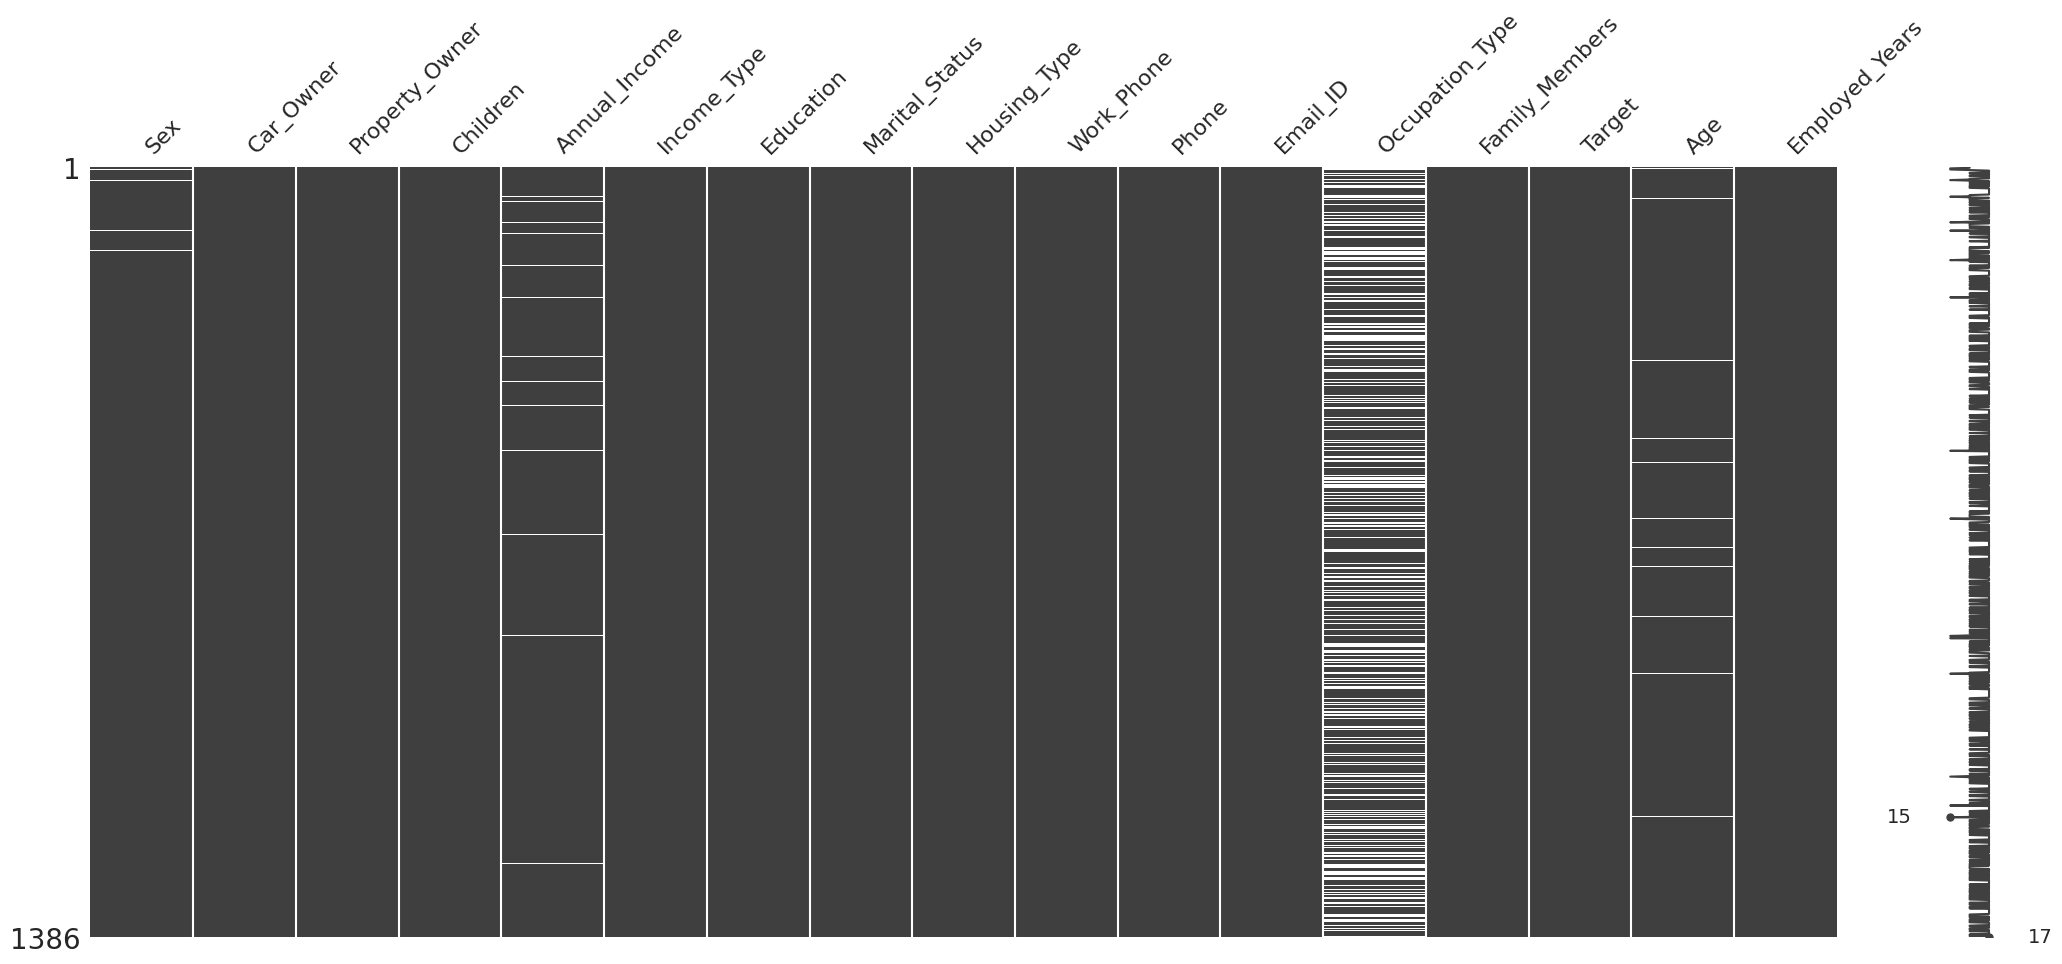

In [ ]:
import missingno as ms
ms.matrix(df_clean2)

<Axes: >

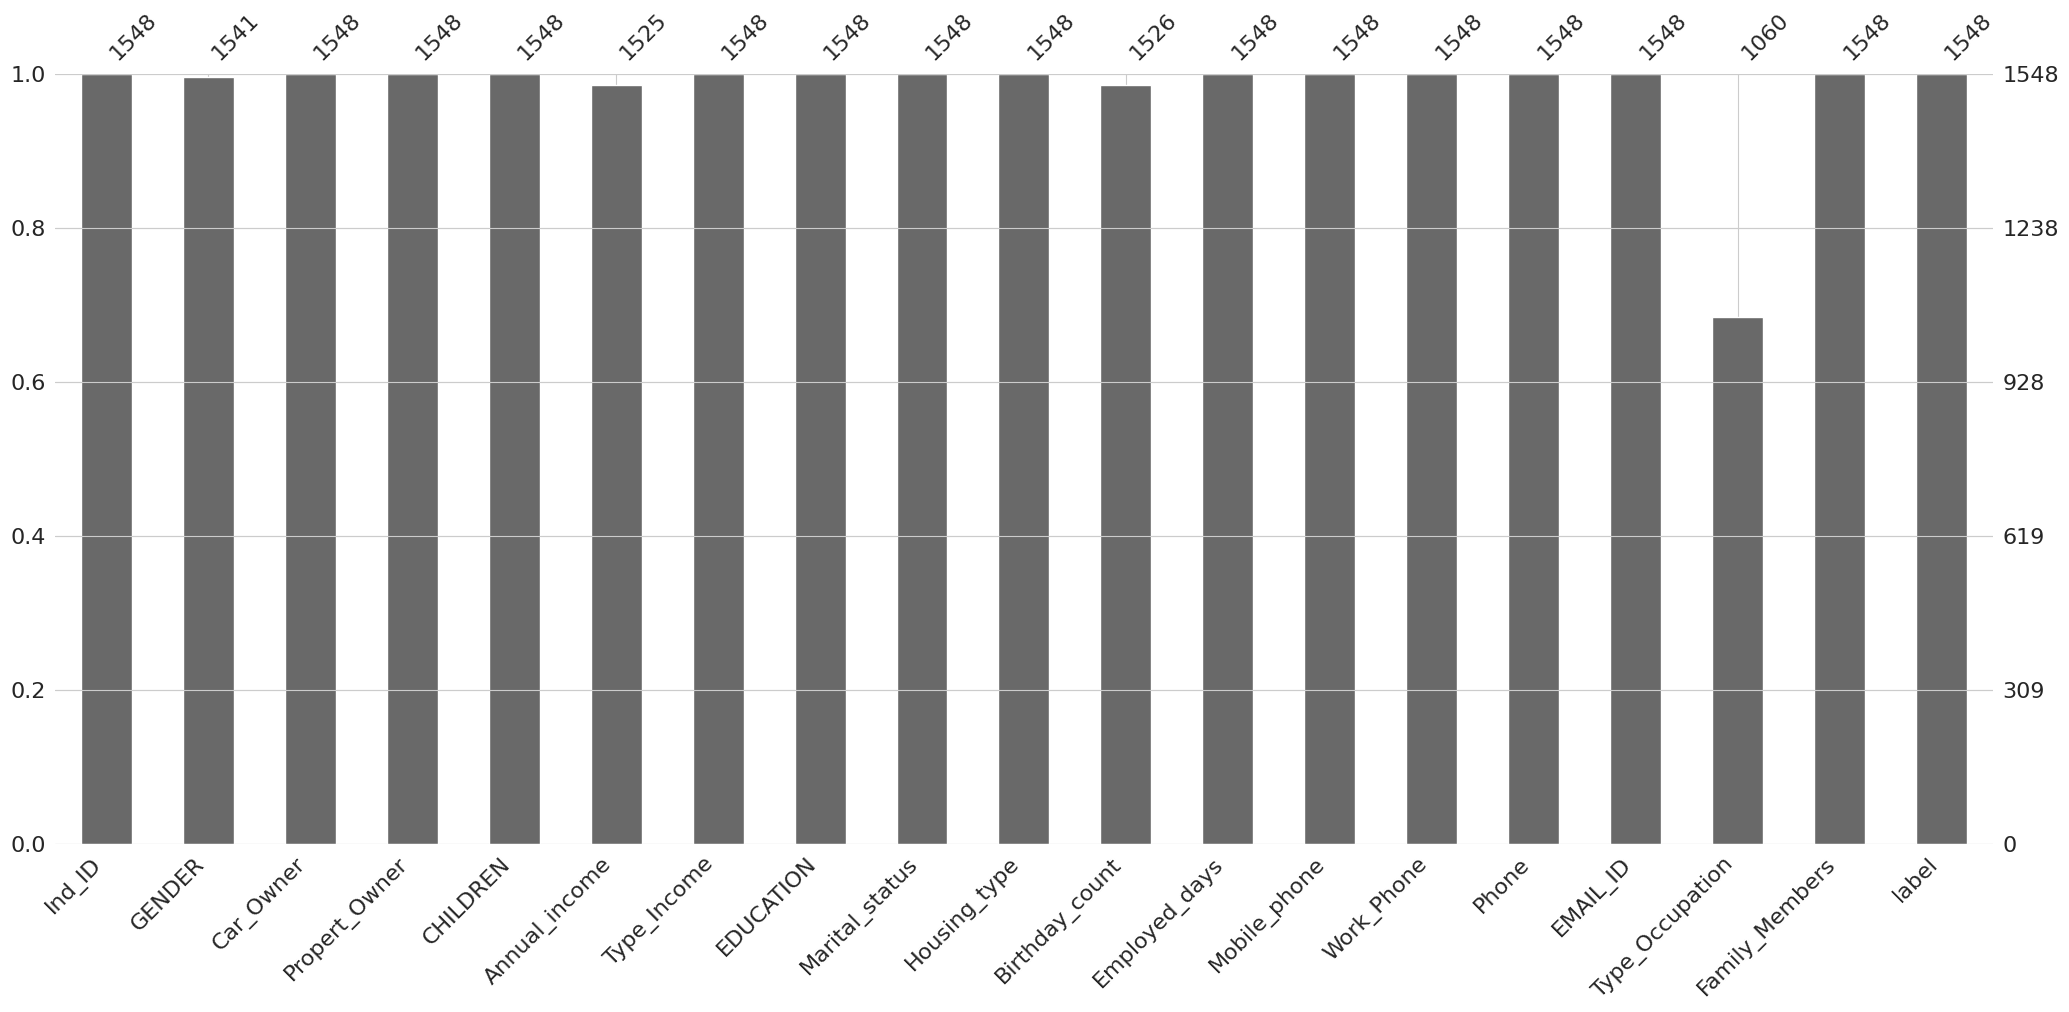

In [ ]:
ms.bar(df)

From the Matrix plot we can see that there is no relation between missing values.

So we can assume that the missing values Missing Completely at Random(MCAR)

In [ ]:
df_filt=df_clean2.loc[(df_clean2['Occupation_Type'].isna()==True) &(df_clean2['Employed_Years']==0) ]
df_filt['Income_Type'].unique()

array(['Pensioner'], dtype=object)

We can see that the applicants with 'Employed_Years'=0 are all 'Pensioner'

and their corresponding 'Occupation_Type'  is 'Null' .

As the applicants are  'Pensioner' we can fill those null values in Occupation_Type by 'Retired' assuming that they are retired.

In [ ]:
#np.Where technique is used to filter out the data and fill the desired columns with desired value
df_clean2['Occupation_Type'] = np.where(df_clean2['Employed_Years'] == 0, 'Retired', df_clean2['Occupation_Type'])

In [ ]:
#Filling the remaining missing values of 'Occupation_Type' by 'Others'
df_clean2['Occupation_Type'].fillna(value='Others',inplace=True)

As the missing data in 'Age' and 'Annual_income' is less than 5% of the total data,

 we can replace them by MEAN or MEDIAN.
Here it is replaced by MEDIAN

  `from sklearn.impute SimpleImputer `is used for missing value imputation

In [ ]:
#Before Imputation The Stats(mean , median ,mode, min, max) of numarical columns
df_clean2[['Age','Annual_Income']].describe()

Age  Annual_Income
count  1364.000000   1.363000e+03
mean     43.899414   1.894781e+05
std      11.545293   1.069330e+05
min      21.095545   3.375000e+04
25%      34.073206   1.215000e+05
50%      42.742777   1.620000e+05
75%      53.506843   2.250000e+05
max      68.299735   1.575000e+06

In [ ]:
from sklearn.impute import SimpleImputer
simple_imputer=SimpleImputer(strategy='median')
df_clean2[['Age','Annual_Income']]=simple_imputer.fit_transform(df_clean2[['Age','Annual_Income']])

In [ ]:
#Stats After Imputation
df_clean2[['Age','Annual_Income']].describe()

Age  Annual_Income
count  1386.000000   1.386000e+03
mean     43.881055   1.890221e+05
std      11.454143   1.060995e+05
min      21.095545   3.375000e+04
25%      34.308666   1.215000e+05
50%      42.742777   1.620000e+05
75%      53.289865   2.250000e+05
max      68.299735   1.575000e+06

In [ ]:
#'Sex' is a categorical features and missing values are less than 5%
print(df_clean2['Sex'].mode())
print(df_clean2['Sex'].value_counts()/len(df))
#Here 'F' is the most frequent value and it is more than 50% of the total data
#so we can fill the missing values  by most frequent value-'F'
df_clean2['Sex'].fillna(value='F', inplace=True)

0    F
Name: Sex, dtype: object
F    0.563307
M    0.327519
Name: Sex, dtype: float64


In [ ]:
df_clean2.isna().sum()

Sex                0
Car_Owner          0
Property_Owner     0
Children           0
Annual_Income      0
Income_Type        0
Education          0
Marital_Status     0
Housing_Type       0
Work_Phone         0
Phone              0
Email_ID           0
Occupation_Type    0
Family_Members     0
Target             0
Age                0
Employed_Years     0
dtype: int64

###Exporitng to CSV format

The Cleaned data( after removing missing and duplicates ) is exported to CSV format for SQL Query purpose

In [ ]:
#Exporting the data as  CSV formate for future use
df_csv= df_clean2.copy(deep=True)
df_csv.replace({'Car_Owner':{'Y':'Yes','N':'No'},
                'Property_Owner':{'Y':'Yes','N':'No'},
                  'Target':{1:'Good', 0:'Bad'}
                },
            inplace=True)

df_csv.to_csv('Credit.csv')

##Grphical Analysis

####Univariate Analysis

#####**Categorical**

In [ ]:
df_plot=df_clean2.copy(deep=True)

In [ ]:
#Here I intentionally change the data types of some Numerical columns to count the number of applicants belongs to that category
#Changing the data types of 'WorK_Phone',Email_ID','Phone'. From Inetger to Object
df_plot=df_plot.astype({
              'Work_Phone': "object",
              'Email_ID':'object',
              'Phone':'object',
              'Children':'object',
              'Family_Members':'object'

              })

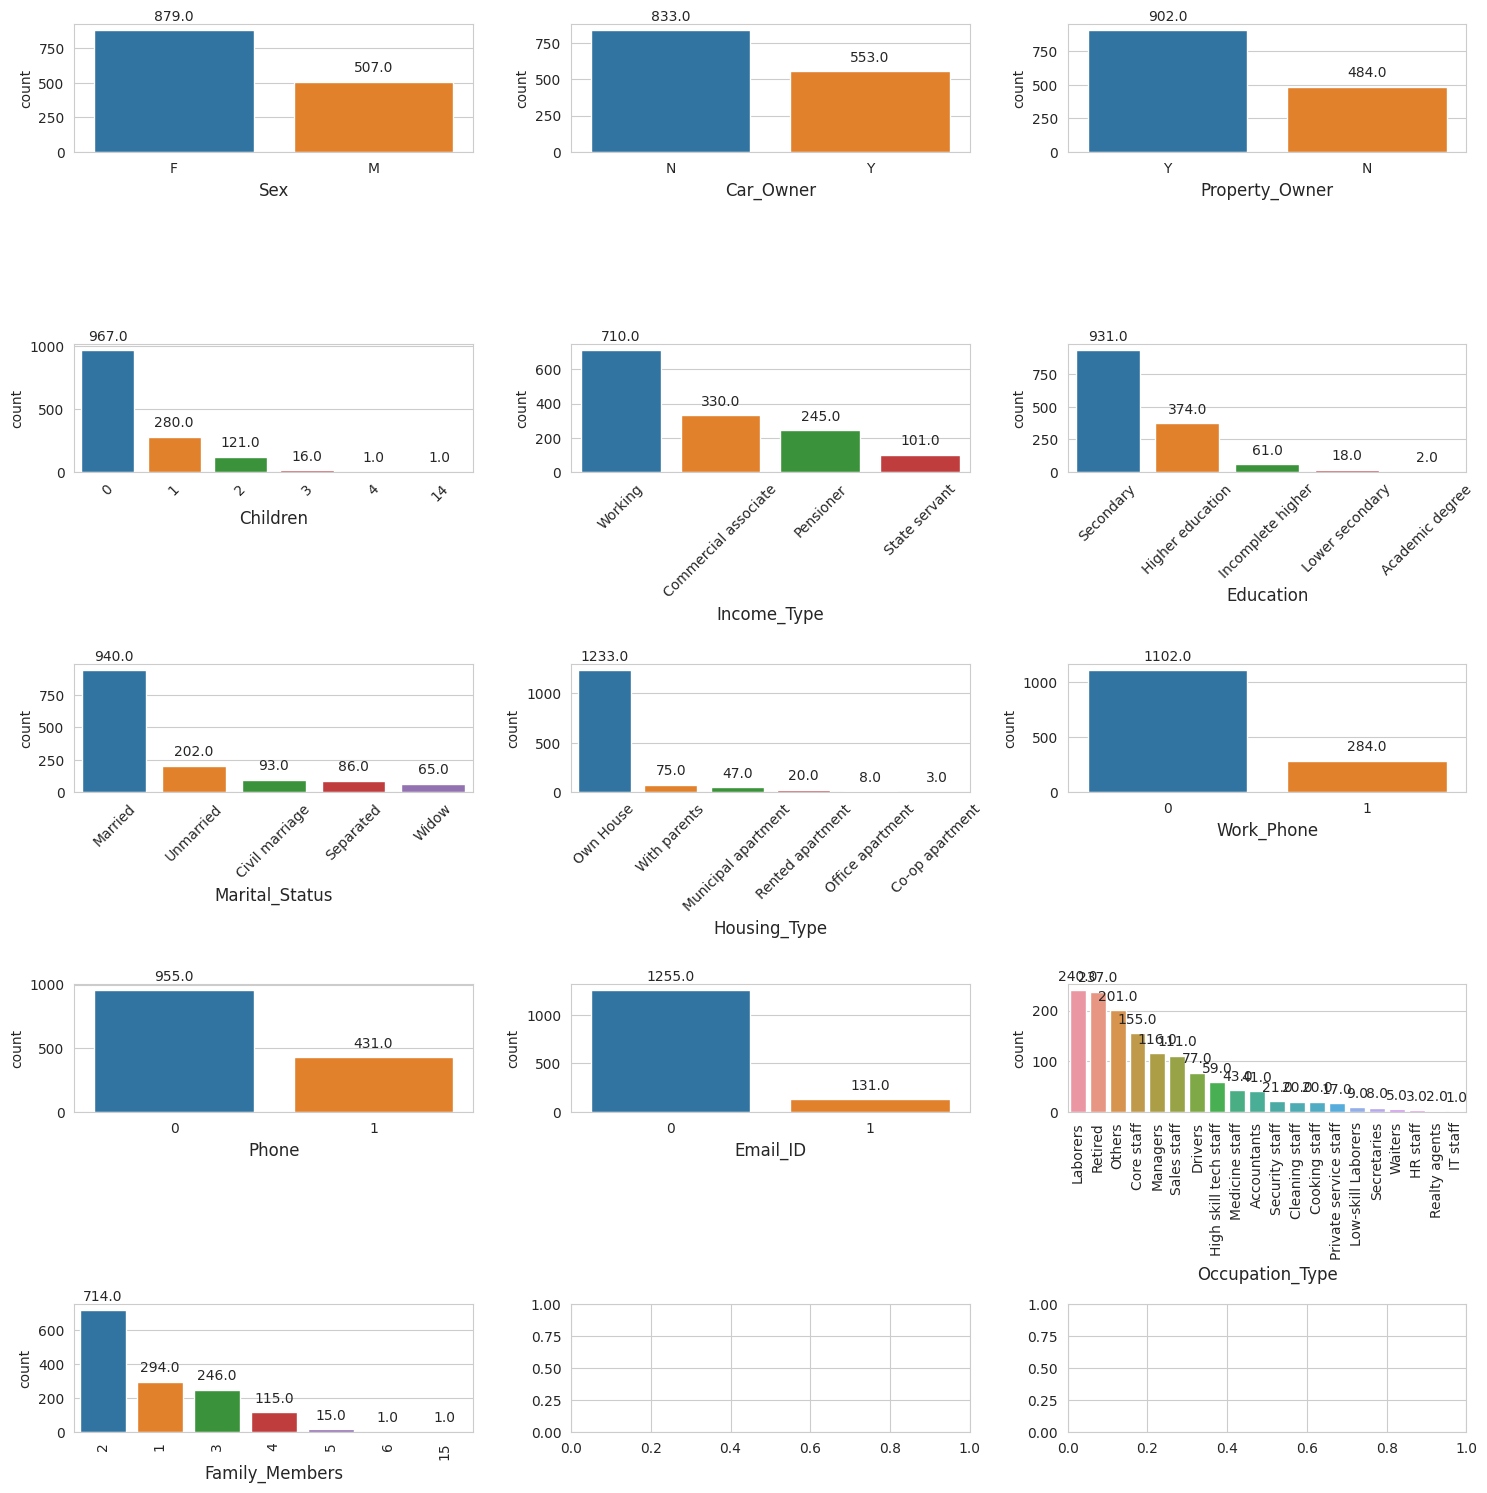

In [ ]:
#count plot of all categorical features. it will help to understand the variance of different category and how it is impacting the target
catg_col = list(df_plot.select_dtypes(include=['object']).columns)
n_rows = 5
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(catg_col):
    ax=sns.countplot(x=col, data=df_plot, order=pd.value_counts(df_plot[col]).index, ax=axes[i])
    for p in ax.patches:
      height = p.get_height()
      ax.annotate(format(height), (p.get_x() + p.get_width() / 2., height),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    axes[i].set_xlabel(col, fontsize=12)
    if df_plot[col].nunique()>3:
      axes[i].tick_params(axis='x', rotation=45)
    if df_plot[col].nunique()>6:
       axes[i].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()






These Countplots are displaying the numbers of applicants in each category

In [ ]:
# catg_col = list(df_plot.select_dtypes(include=['object']).columns)

# n_rows = 5
# n_cols = 3
# fig, axes = plt.subplots(n_rows, n_cols,figsize=(15,15))
# axes = axes.flatten()

# for i, col in enumerate(catg_col):
#     value_counts = df_plot[col].value_counts()
#     ax = axes[i]
#     ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
#     ax.set_title(col)
# plt.tight_layout()
# plt.show()

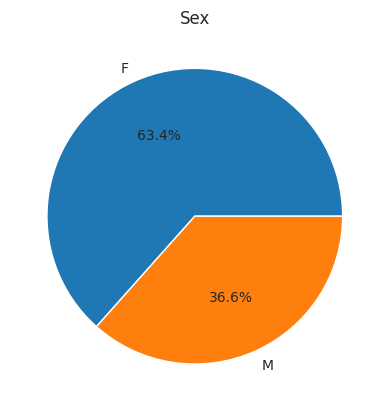

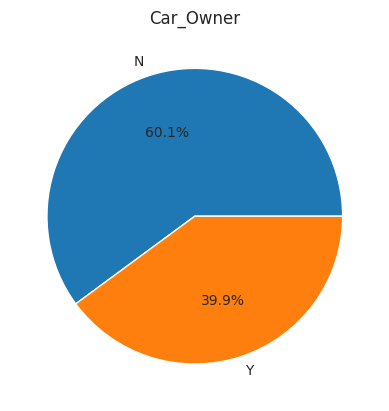

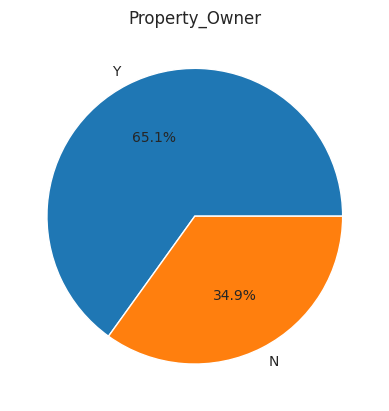

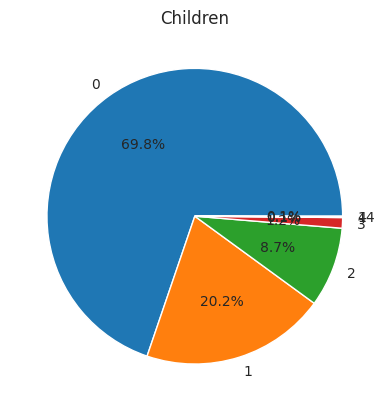

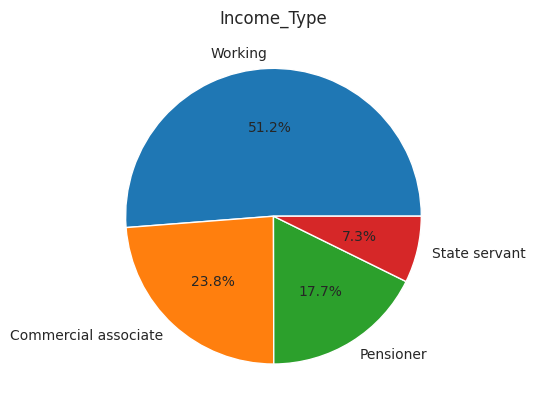

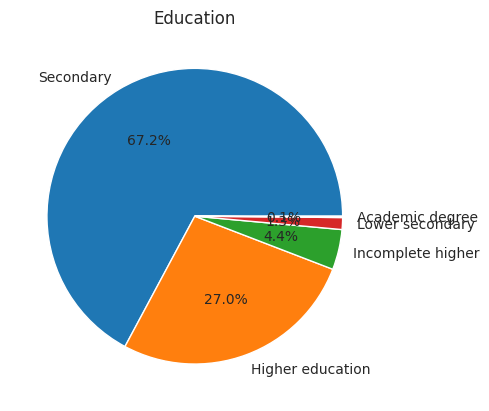

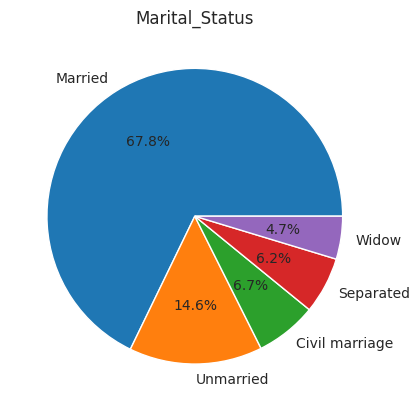

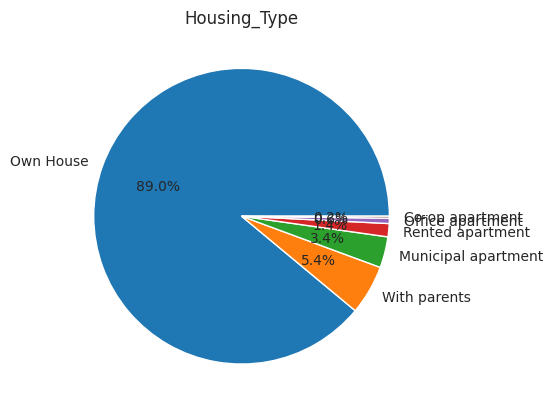

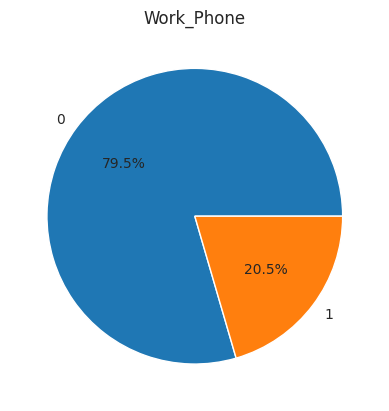

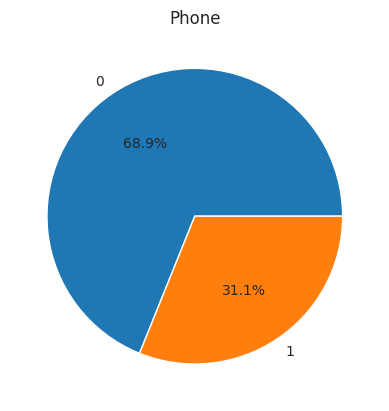

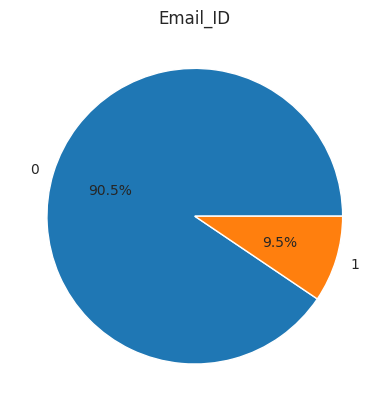

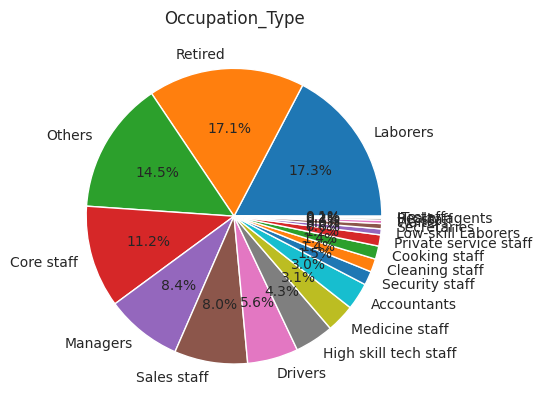

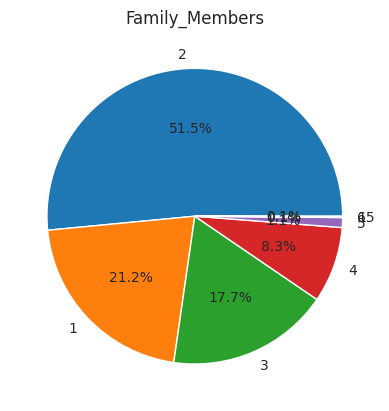

In [ ]:
 #pie plot shows the percentages of applicanats in different category
 catg_col = list(df_plot.select_dtypes(include=['object']).columns)
 for i in (catg_col):
    value_counts = df_plot[i].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(i)
    plt.show()

In [ ]:
# for c in df_plot.columns:
#   if df_plot[c].dtypes=='object':
#       print(df_plot[c].value_counts())
#       print('-'*50)
#       print('Normalized value counts:\n')
#       print((df_plot[c].value_counts(normalize=True) *100).round(2))
#       print('**'*50)
#       print('\n')

#####**Numaricals**

HISTOGRAM AND BOXPLOT

Skewness and Kurtosis


 	 		  		  Distribution plot and Boxplot ofAge 


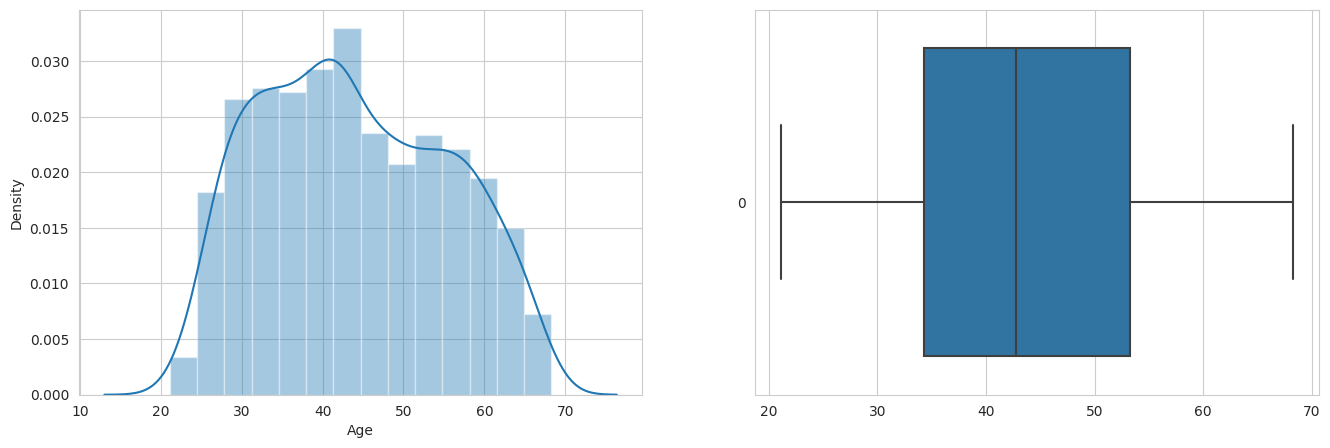

Skewness=0.18337135613591357 

Kurtosis=-1.0082722734805123


In [ ]:
print( Fore.BLACK + Style.BRIGHT + ' \t \t\t  \t\t  Distribution plot and Boxplot ofAge ') #Heading of the plot
#plots for age
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_plot['Age'])#Distribution Plot

plt.subplot(1,2,2)
sns.boxplot(df_plot['Age'],orient="h") #Box plot

plt.show()
print(Fore.BLACK + Style.BRIGHT + f'Skewness={skew(df_plot.Age)} \n\nKurtosis={kurtosis(df_plot.Age)}' )#Skewness and kurtosis measure

There is no Outliers in  Age and the Skewness of the data is close to zero means the data is almost normally distributed

 	 		  		  Distribution plot and Boxplot of Employed_Years  


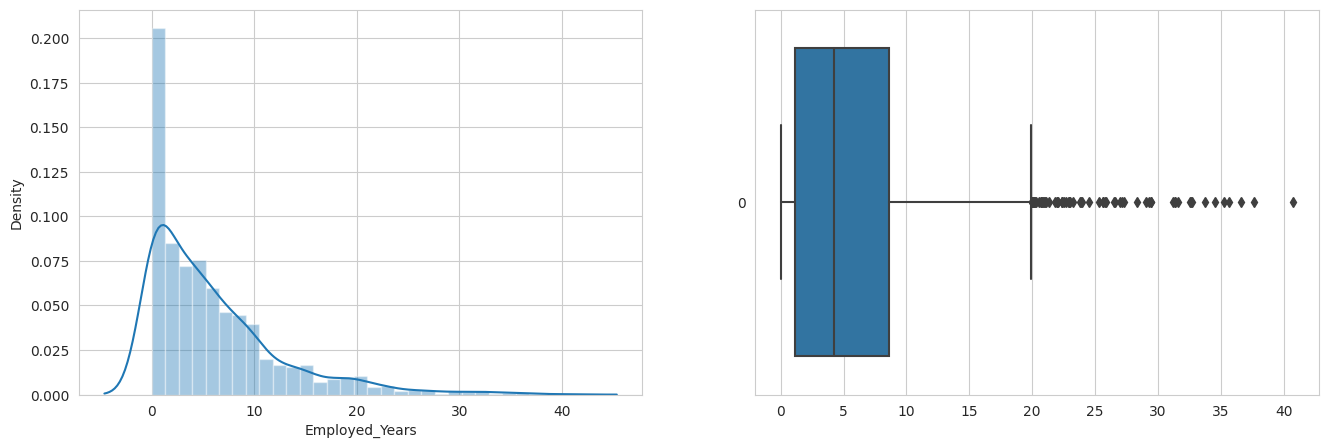

Skewness=1.751022521822469 

Kurtosis=3.70626293093732


In [ ]:
print( Fore.BLACK + Style.BRIGHT + ' \t \t\t  \t\t  Distribution plot and Boxplot of Employed_Years  ') #Heading of the plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_plot['Employed_Years'])

plt.subplot(1,2,2)
sns.boxplot(df_plot['Employed_Years'],orient="h")

plt.show()
print(Fore.BLACK + Style.BRIGHT +f'Skewness={skew(df_plot.Employed_Years)} \n\nKurtosis={kurtosis(df_plot.Employed_Years)}' )

Employed years is right skewed and outliers present

 	 		  		  Distribution plot and Box Plot of Annual income 


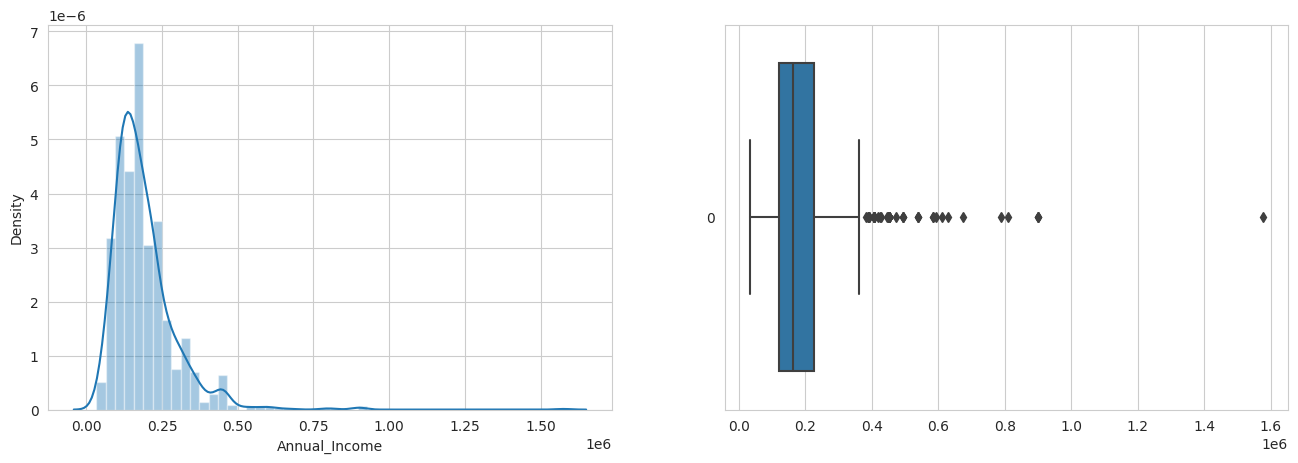

Skewness=3.360930956830485 

Kurtosis=27.015889488926693


In [ ]:
print( Fore.BLACK + Style.BRIGHT + ' \t \t\t  \t\t  Distribution plot and Box Plot of Annual income ') #Heading of the plot

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_plot['Annual_Income'])

plt.subplot(1,2,2)
sns.boxplot(df_plot['Annual_Income'],orient="h")

plt.show()
print(Fore.BLACK + Style.BRIGHT +f'Skewness={skew(df_plot.Annual_Income)} \n\nKurtosis={kurtosis(df_plot.Annual_Income)}' )

Annual Income is highly right skewed and outliers is present in the data

####**Bivariate Analysis**

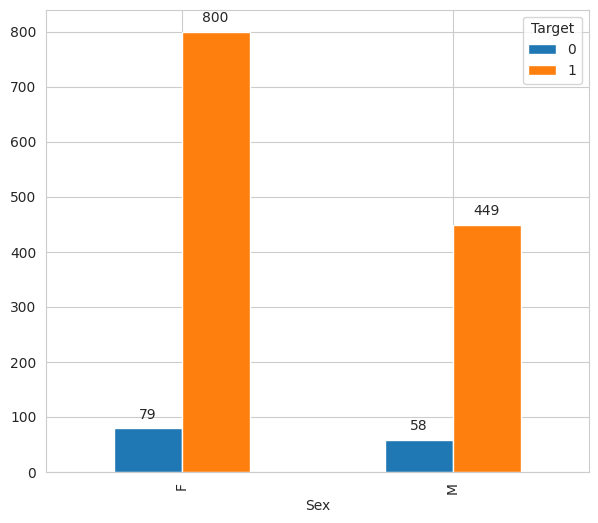

In [ ]:
#sex vs target
cross_tab=pd.crosstab(df_plot['Sex'],df_plot['Target'])
ax=cross_tab.plot(kind='bar',figsize=(7,6))
for p in ax.patches:
      height = p.get_height()
      ax.annotate(format(height), (p.get_x() + p.get_width() / 2., height),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
#percentage of  male and female applicants approved and not approved for credit cards
pd.crosstab(df_plot['Sex'],df_plot['Target'],normalize='index').round(2)*100

Target     0     1
Sex               
F        9.0  91.0
M       11.0  89.0

In the dataset number of female applicants are more and the rate of getting credit card is more for female applicants than male applicants

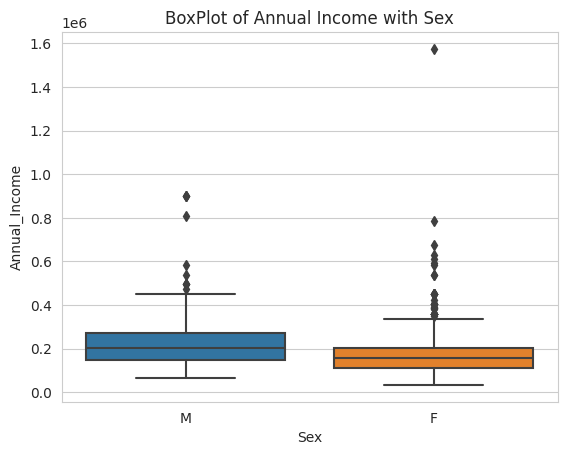

In [ ]:
#Annual income of male and female applicants
sns.set_style('whitegrid')
sns.boxplot(df_plot,x='Sex', y='Annual_Income')
plt.title('BoxPlot of Annual Income with Sex')
plt.show()

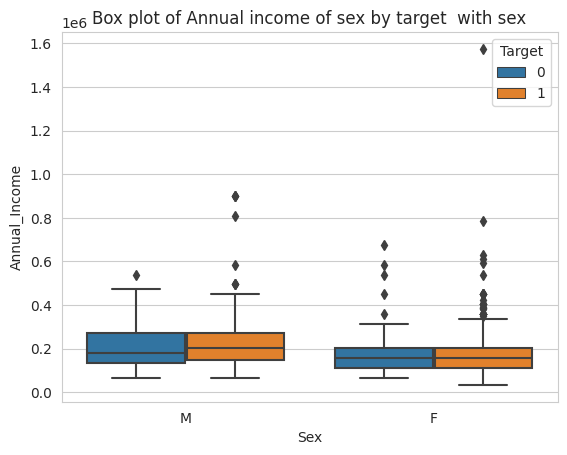

In [ ]:
#boxplot of sex vs annual income with target
sns.boxplot(df_plot, y='Annual_Income', x='Sex',hue='Target')
plt.title('Box plot of Annual income of sex by target  with sex')
plt.show()

From the boxplot of Annual income of sex with target we can observe that annual income of approved and declined applicants of both sex are almost equally distributed.

Therefore annual income is not a significant features for credit card approval

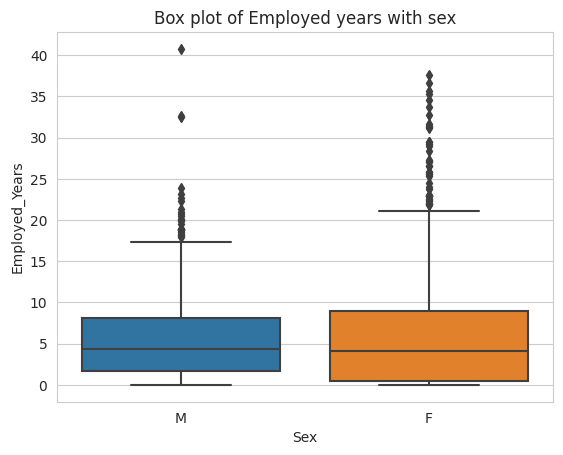

In [ ]:
# Years of employed of by sex
sns.boxplot(df_plot, y='Employed_Years', x='Sex')
plt.title('Box plot of Employed years with sex')
plt.show()

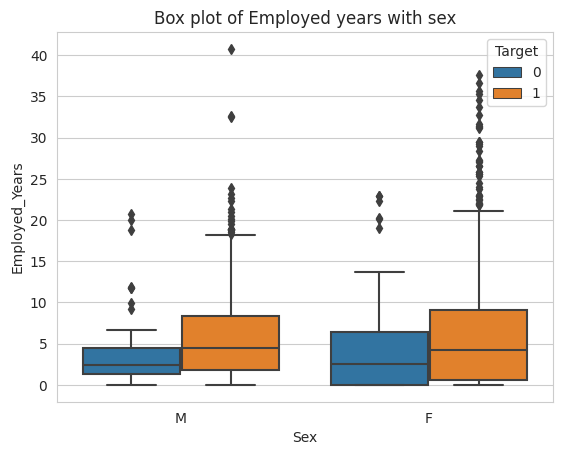

In [ ]:
sns.boxplot(df_plot, y='Employed_Years', x='Sex', hue ='Target')
plt.title('Box plot of Employed years with sex')
plt.show()

Peoples employed for longer period are more likely to have credit card.

Female applicants are emplyoed for longer duration compared to male applicants

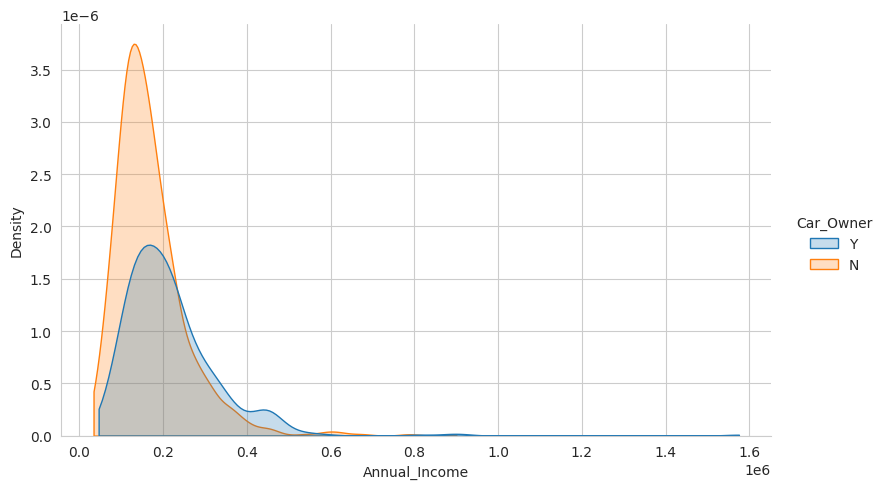

In [ ]:
#Distplot of Annual income vs car owner
sns.displot(data=df_plot, hue='Car_Owner',x='Annual_Income',
            kind="kde", fill=True, legend=True, height=5, aspect=1.6,
            cut=0, bw_adjust=1)

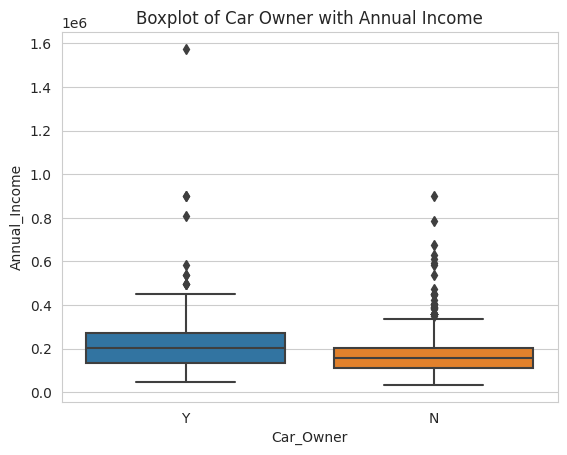

In [ ]:
#Annual income vs car owner
sns.boxplot(df_plot, x='Car_Owner', y='Annual_Income')
plt.title('Boxplot of Car Owner with Annual Income')
plt.show()

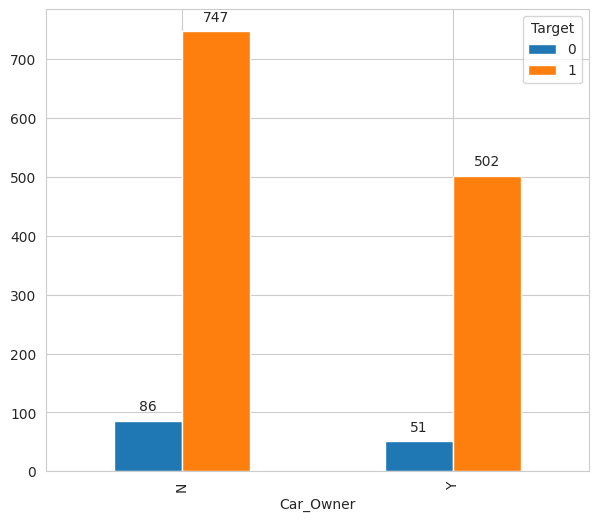

In [ ]:
#car_owner vs target
cross_tab=pd.crosstab(df_plot['Car_Owner'],df_plot['Target'])
ax=cross_tab.plot(kind='bar',figsize=(7,6))
for p in ax.patches:
      height = p.get_height()
      ax.annotate(format(height), (p.get_x() + p.get_width() / 2., height),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

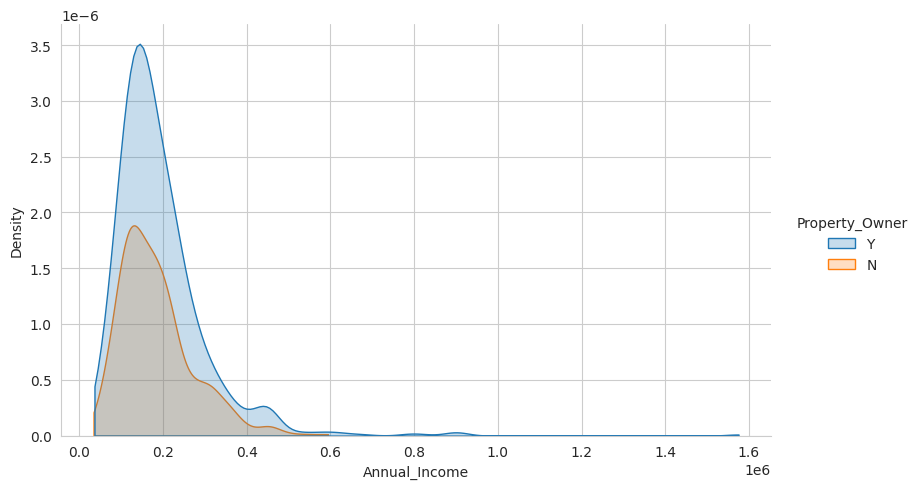

In [ ]:
#Distplot of Annual income vs property owner
sns.displot(data=df_plot, hue='Property_Owner',x='Annual_Income',
            kind="kde", fill=True, legend=True, height=5, aspect=1.6,
            cut=0, bw_adjust=1)

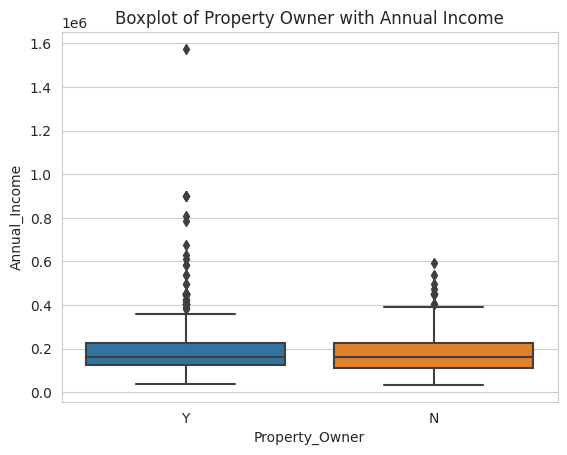

In [ ]:
#Box plot of Annual income vs property owner
sns.boxplot(df_plot, x='Property_Owner', y='Annual_Income')
plt.title('Boxplot of Property Owner with Annual Income')
plt.show()

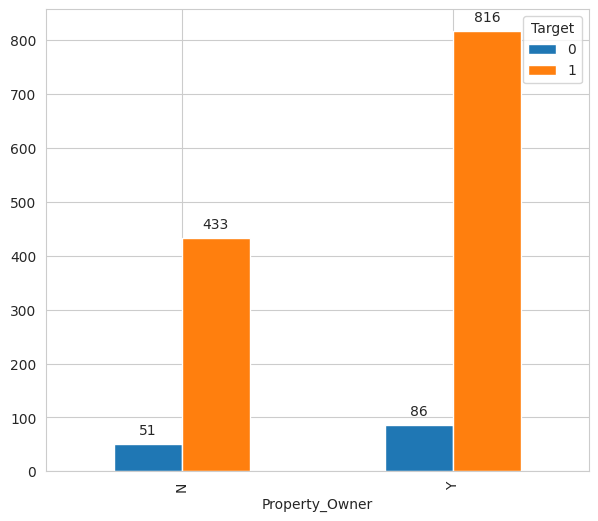

In [ ]:
#Property owner vs target
cross_tab=pd.crosstab(df_plot['Property_Owner'],df_plot['Target'])
ax=cross_tab.plot(kind='bar',figsize=(7,6))
for p in ax.patches:
      height = p.get_height()
      ax.annotate(format(height), (p.get_x() + p.get_width() / 2., height),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

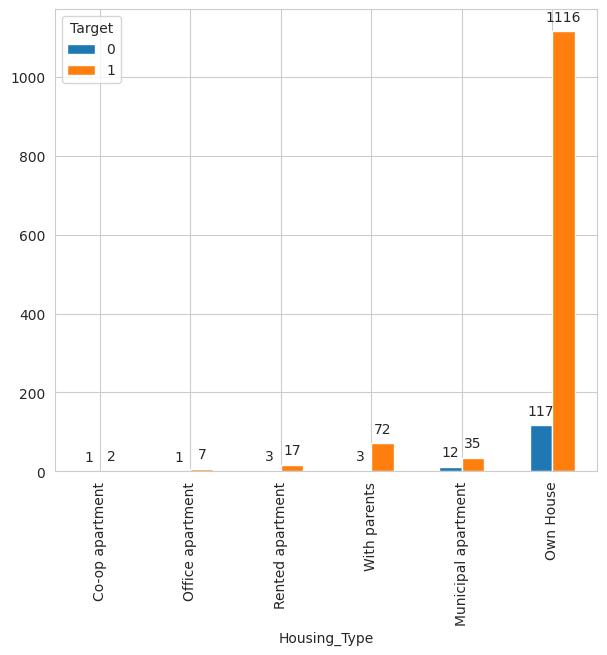

In [ ]:
cross_tab=pd.crosstab(df_plot['Housing_Type'],df_plot['Target']).sort_values(by=0)
ax=cross_tab.plot(kind='bar',figsize=(7,6))
for p in ax.patches:
      height = p.get_height()
      ax.annotate(format(height), (p.get_x() + p.get_width() / 2., height),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
(pd.crosstab(df_plot['Housing_Type'],df_plot['Target'],normalize='index')*100).round(2).sort_values(by=0)

Target                   0      1
Housing_Type                     
With parents          4.00  96.00
Own House             9.49  90.51
Office apartment     12.50  87.50
Rented apartment     15.00  85.00
Municipal apartment  25.53  74.47
Co-op apartment      33.33  66.67

Those who are living in their own house or with parents are more likely to have credit card

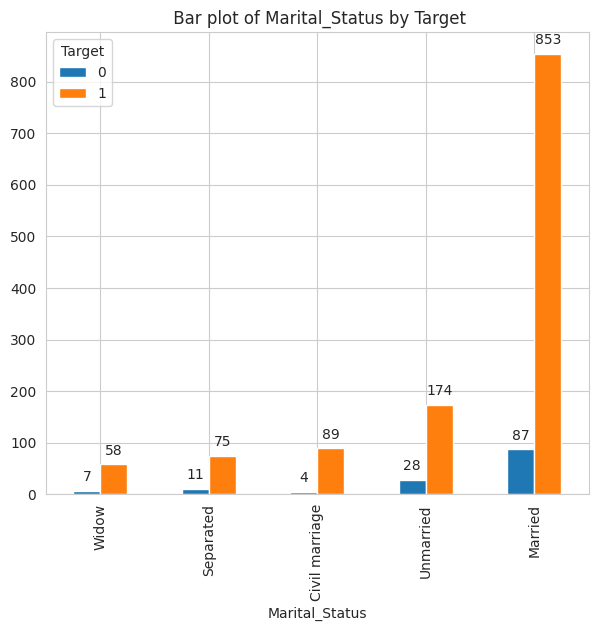

In [ ]:
# Bar plot of Marital_Status by Target
cross_tab=pd.crosstab(df_plot['Marital_Status'],df_plot['Target']).sort_values(by=1 )
ax=cross_tab.plot(kind='bar',figsize=(7,6))
for p in ax.patches:
      height = p.get_height()
      ax.annotate(format(height), (p.get_x() + p.get_width() / 2., height),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title(' Bar plot of Marital_Status by Target')
plt.show()


In [ ]:
#Normalized crosstab of Marital Status with Target
(pd.crosstab(df_plot['Marital_Status'],df_plot['Target'],normalize='index')*100).round(2)

Target              0      1
Marital_Status              
Civil marriage   4.30  95.70
Married          9.26  90.74
Separated       12.79  87.21
Unmarried       13.86  86.14
Widow           10.77  89.23

From the bar plot and pivot table we can see that married people are more likely to be approved for credit card. unmarried people are less eligeble for credit card

##Features Transformation & Outliers


###**Features Transformation**

Features transformation is an important technique used in data analysis and modeling that can improve the accuracy and precision of statistical models, normalize data, linearize relationships, and reduce the influence of extreme values.

 here I use

`from sklearn.preprocessing `
library `FunctionTransformer` module is used for transforming the featuere

There are different Function for transforming the data

1. $log$ transformation
2. $Square$ transformation
3. $Square  Root$ transformation
4. $Reciprocal$ transformation


In [ ]:
features=df_clean2.drop('Target',axis=1)
target=df_clean2['Target']

In [ ]:
from sklearn.preprocessing import FunctionTransformer

Distribution Plot and QQ plot for '**Annual_Income**' to visualise the ditribution of the data

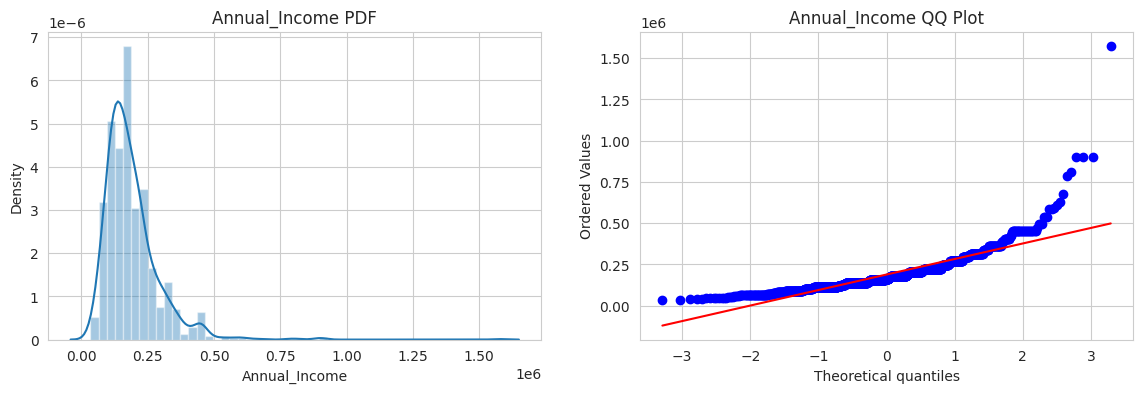

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(features['Annual_Income'])
plt.title('Annual_Income PDF')

plt.subplot(122)
stats.probplot(features['Annual_Income'], dist="norm", plot=plt)
plt.title('Annual_Income QQ Plot')

plt.show()

From the Distribution plot and QQ plot it is seen that the data is not normally distributed but Right skewed

***log transformation*** is aapplied to transform **'Annual Income** .

log transformation perform better in right skewed data over other funtion transformation

In [ ]:
trnsf=FunctionTransformer(func=np.log1p)
features['Annual_Income']=trnsf.fit_transform(features['Annual_Income'])


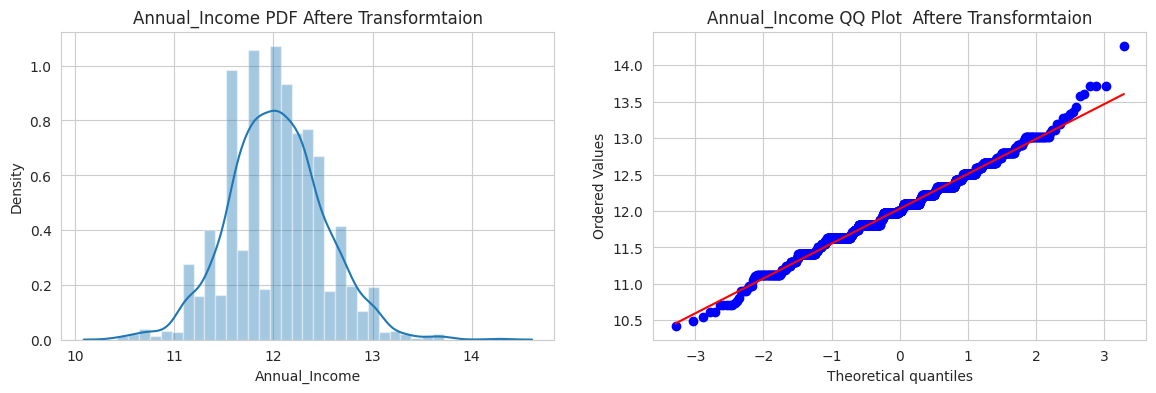

In [ ]:
#Dist plot and QQ plot after transformation
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(features['Annual_Income'])
plt.title('Annual_Income PDF Aftere Transformtaion')

plt.subplot(122)
stats.probplot(features['Annual_Income'], dist="norm", plot=plt)
plt.title('Annual_Income QQ Plot  Aftere Transformtaion')

plt.show()

After **log** **trasformation** we can see from the plots that the distribution is almost normal  and QQ plot fitted very well with the data poits

Distribution Plot and QQ plot for **'Employed_Years'** to visualise the ditribution of the dataEmployed_Years

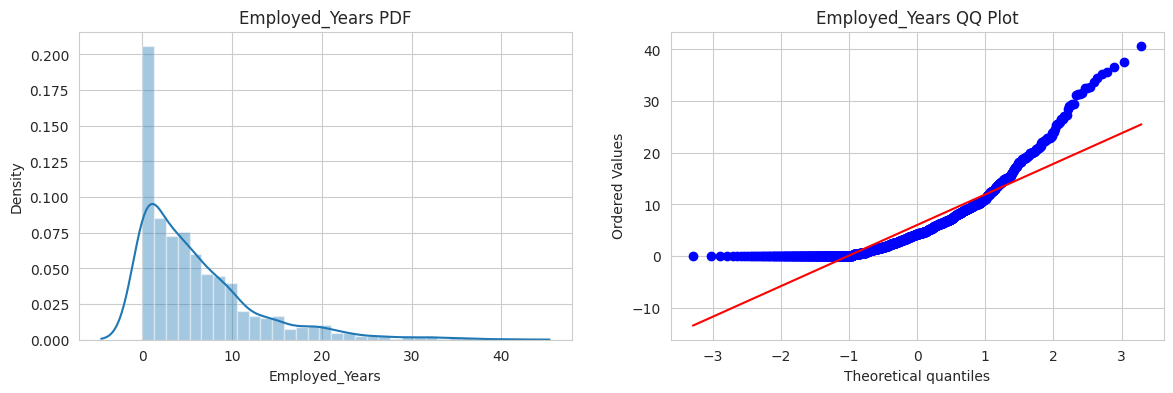

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(features['Employed_Years'])
plt.title('Employed_Years PDF')

plt.subplot(122)
stats.probplot(features['Employed_Years'], dist="norm", plot=plt)
plt.title('Employed_Years QQ Plot')

plt.show()

 'Employed_Years' is transformed by  using Reciprocal Transformation.

 log , Square , and Square Root transfomation did not worked better

In [ ]:
trnsf=FunctionTransformer(func=(lambda x:x**(1/2)))
features['Employed_Years']=trnsf.fit_transform(features.Employed_Years)

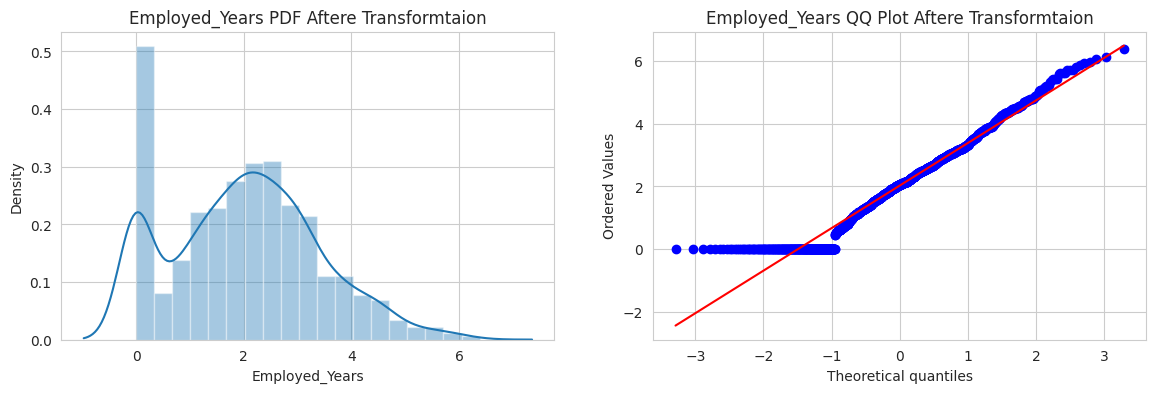

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(features['Employed_Years'])
plt.title('Employed_Years PDF Aftere Transformtaion')

plt.subplot(122)
stats.probplot(features['Employed_Years'], dist="norm", plot=plt)
plt.title('Employed_Years QQ Plot Aftere Transformtaion')

plt.show()

The distribution become almost normal and QQ plot fit qiet well but in the data set lots of '0 years'is present which s outliers thats giving the abnormality in the plot after transformation.

Distribution Plot and QQ plot for **'Age'** to visualise the ditribution of the data **'Age'**

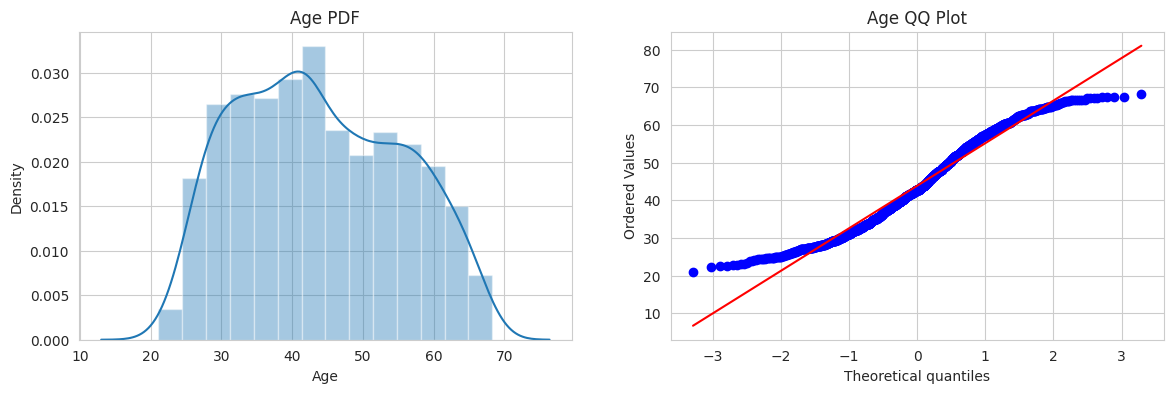

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(features['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(features['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

From the visualisatiion the distribution  we can see that  the data  is almost noramlly ditributed.

Neverthless log tranformation and other transformation is applied but no singnificane change is observed in the distribution.. No transformation is applied

In [ ]:
#trnsf=FunctionTransformer(func=np.log1p)
#features['Age']=trnsf.fit_transform(features['Age'])

Text(0.5, 1.0, 'Age QQ Plot')

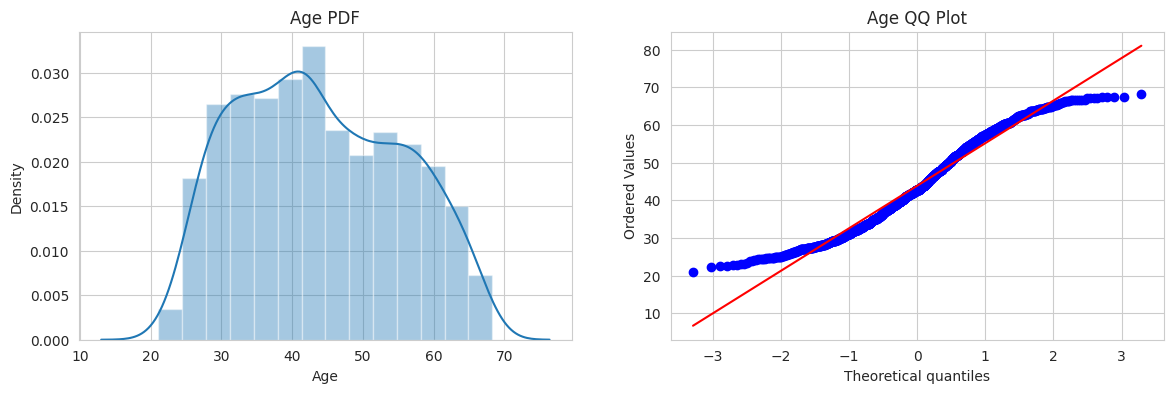

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(features['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(features['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

###**Outliers**


The Outliers can be detected by the following method
1. IQR Box_ Plot
2. Z-score

As all the numaricals columns are normalized. Z-Score technique is prefered for normally distributed columns over IQR

if the Z-score value is greater than 3 or less than -3, respectively, that data point will be identified as an outlier

 After identifying the outliers it can be removed by
1. Trimming
2. Capping

Capping is prefered over Trimmig because it preserve more of the original data and maintain the shape of the distribution.

A function is defined for Capping outliers  using Z-score

In [ ]:
def cap_outliers_zscore(data, column, threshold=3):
    # Calculate the mean and standard deviation of the column
    mean = np.mean(data[column])
    std = np.std(data[column])

    # Calculate the z-scores for each value in the column
    zscores = abs((data[column] - mean) / std)

    # Cap the outliers based on the threshold
    max_cap_value = mean + (std * threshold)
    data[column] = np.where(data[column] > max_cap_value, max_cap_value, data[column])

    # Replace values less than the mean - threshold * std with the same value
    min_cap_value = mean - (std * threshold)
    data[column] = np.where(data[column] < min_cap_value, min_cap_value, data[column])

    return data

In [ ]:
from colorama import Fore, Style

# Set the font style
#font_style = Style.BRIGHT

# Create a string to be printed
#my_string = 'This is my string!'

# Format the string with bold font
#formatted_string = Style.BRIGHT + 'This is my string!'

# Print the formatted string in red color
#print(Fore.RED + Style.BRIGHT + 'This is my string!')

In [ ]:
#checking mean, median , mode, max, min before removing outliers
features[['Annual_Income','Employed_Years','Age']].describe()

Annual_Income  Employed_Years          Age
count    1386.000000     1386.000000  1386.000000
mean       12.030399        2.023641    43.881055
std         0.479749        1.379123    11.454143
min        10.426765        0.000000    21.095545
25%        11.707678        1.062081    34.308666
50%        11.995358        2.055045    42.742777
75%        12.323860        2.938480    53.289865
max        14.269766        6.384291    68.299735

       	 		 Distribution and Box Plot  Before Removing Outliers


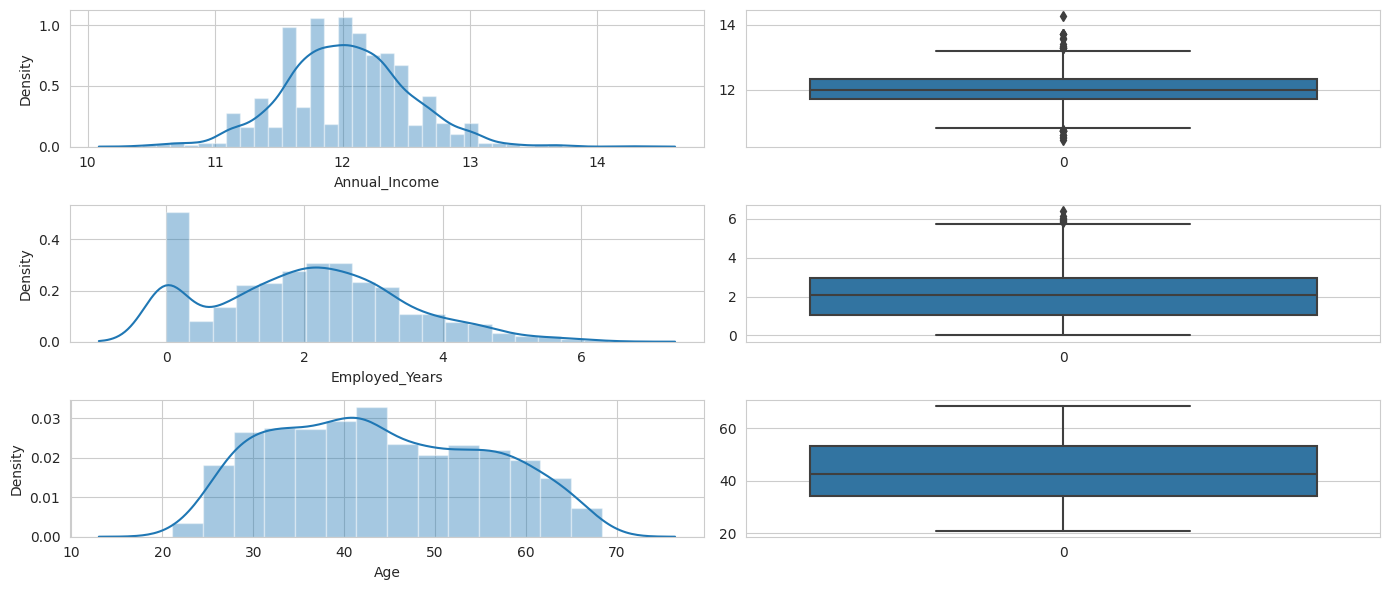

In [ ]:
#Ditribution Plots and Box Plots before removing outliers
print( Fore.BLACK + Style.BRIGHT + '       \t \t\t Distribution and Box Plot  Before Removing Outliers')

plt.figure(figsize=(14,6))

plt.subplot(321)
sns.distplot(features.Annual_Income)
plt.title('')
plt.subplot(322)
sns.boxplot(features.Annual_Income)

plt.subplot(323)
sns.distplot(features.Employed_Years)
plt.subplot(324)
sns.boxplot(features.Employed_Years)

plt.subplot(325)
sns.distplot(features.Age)
plt.subplot(326)
sns.boxplot(features.Age)
plt.tight_layout()
plt.show()


In [ ]:
#Capping the outliers using z-score for 'Annual_Income','Employed_Years' and 'Age' columns respectively

features = cap_outliers_zscore(features, 'Annual_Income')
features = cap_outliers_zscore(features, 'Employed_Years')
features = cap_outliers_zscore(features, 'Age')



In [ ]:
# mean, median , mode, max, min after removing outliers
features[['Annual_Income','Employed_Years','Age']].describe()

Annual_Income  Employed_Years          Age
count    1386.000000     1386.000000  1386.000000
mean       12.029353        2.023479    43.881055
std         0.474541        1.378623    11.454143
min        10.591672        0.000000    21.095545
25%        11.707678        1.062081    34.308666
50%        11.995358        2.055045    42.742777
75%        12.323860        2.938480    53.289865
max        13.469126        6.159517    68.299735

      	 		 Distribution and Box Plot After Removing Outliers


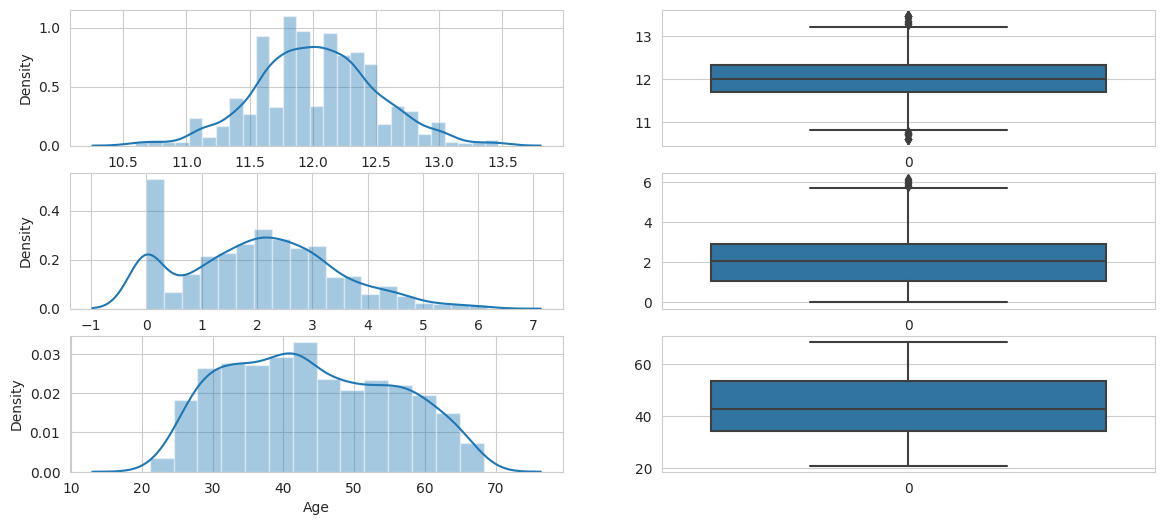

In [ ]:
#Ditribution Plots and Box Plots after removing outliers
print( Fore.BLACK + Style.BRIGHT + '      \t \t\t Distribution and Box Plot After Removing Outliers')
plt.figure(figsize=(14,6))

plt.subplot(321)
sns.distplot(features.Annual_Income)
plt.subplot(322)
sns.boxplot(features.Annual_Income)

plt.subplot(323)
sns.distplot(features.Employed_Years)
plt.subplot(324)
sns.boxplot(features.Employed_Years)

plt.subplot(325)
sns.distplot(features.Age)
plt.subplot(326)
sns.boxplot(features.Age)

plt.show()

In [ ]:
#concatinate the Features and Target
df_clean=pd.concat([features,target],axis=1)

In [ ]:
df_clean # Dataset after removing all the null, duplicate, outliesrs and
#       after applying transformation to normalize the numarical data

Sex Car_Owner Property_Owner  Children  Annual_Income  \
0      M         Y              Y         0      12.100718   
1      F         Y              N         0      12.660331   
2      F         Y              N         0      12.660331   
3      F         Y              N         0      11.995358   
5      F         Y              N         0      12.660331   
...   ..       ...            ...       ...            ...   
1542   M         Y              N         1      12.793862   
1543   F         N              Y         0      11.995358   
1544   F         N              N         0      12.323860   
1546   M         Y              N         0      12.506181   
1547   F         Y              Y         0      12.323860   

               Income_Type          Education  Marital_Status Housing_Type  \
0                Pensioner   Higher education         Married    Own House   
1     Commercial associate   Higher education         Married    Own House   
2     Commercial associate   Higher education         Married    Own House   
3     Commercial associate   Higher education         Married    Own House   
5                Pensioner   Higher education         Married    Own House   
...                    ...                ...             ...          ...   
1542         State servant          Secondary         Married    Own House   
1543  Commercial associate   Higher education         Married    Own House   
1544  Commercial associate  Incomplete higher       Unmarried    Own House   
1546               Working          Secondary  Civil marriage    Own House   
1547               Working   Higher education         Married    Own House   

      Work_Phone  Phone  Email_ID Occupation_Type  Family_Members        Age  \
0              0      0         0         Retired               2  51.395920   
1              1      1         0          Others               2  37.117754   
2              1      1         0          Others               2  42.742777   
3              1      1         0          Others               2  37.117754   
5              1      1         0          Others               2  37.117754   
...          ...    ...       ...             ...             ...        ...   
1542           0      1         0         Drivers               3  30.921879   
1543           0      0         0        Managers               2  32.737109   
1544           0      0         0     Accountants               1  28.006012   
1546           1      1         0         Drivers               2  41.868017   
1547           0      0         0          Others               2  45.451932   

      Employed_Years  Target  
0           0.000000       0  
1           1.266654       0  
2           1.266654       0  
3           1.266654       0  
5           1.266654       0  
...              ...     ...  
1542        3.111467       1  
1543        2.444198       1  
1544        1.819375       1  
1546        1.328890       1  
1547        2.797797       1  

[1386 rows x 17 columns]

##**Hypothesis Testing**


###***Q1. "Does the approval of a credit card depend on the annual income of the applicant?"***

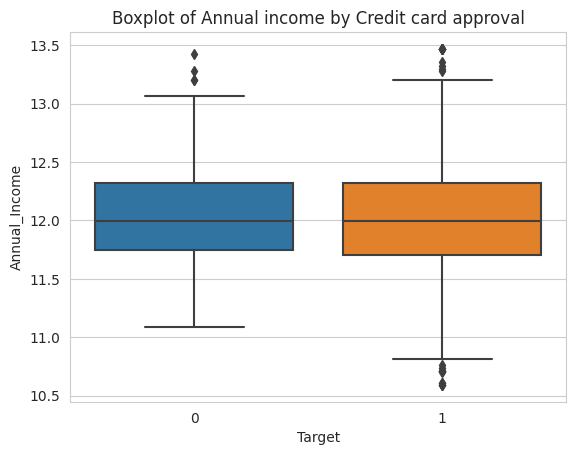

In [ ]:
#Box plot of "annual income" by "target"
sns.set_style('whitegrid')
sns.boxplot(df_clean,x='Target',y='Annual_Income')
plt.title('Boxplot of Annual income by Credit card approval')
plt.show()

From the plots we can see that there is no significance change in the distribution with credit_score =1 and credit_score=0



**Null hypothesis(H0)**: There is no significant difference in the likelihood of getting a credit card between clients with higher and lower annual income.

**Alternative hypothesis(H1):** Clients with higher annual income are more likely to get the credit card than clients with lower annual income.



In [ ]:
# Split the data into two groups based on the label variable (i.e., who gets the credit card)
credit = df_clean[df_clean['Target'] == 1]
no_credit = df_clean[df_clean['Target'] == 0]

# Compare the mean annual income between the two groups using a t-test
t_stat, p_val = stats.ttest_ind(credit['Annual_Income'], no_credit['Annual_Income'], equal_var=False)
print('t-statistic:', t_stat)
print('p-value:', p_val)


t-statistic: -0.8917996399531194
p-value: 0.3738234703802221


**Inference:**
> The p-value is greater than the significance level of 0.05, indicating that we fail to reject the null hypothesis that there is no significant difference. Therefore, we cannot conclude that credit card approval depends on annual income.

>***Fail to reject H0***

###***Q2. "Is there a significant difference in the likelihood of getting a credit card between clients who own assets and those who don't?"***

In [ ]:
#Contigency table 'Car_owner + Prorety_owner' by 'Target'
contingency_table_noramlize=pd.crosstab(df_clean['Car_Owner'] + df_clean['Property_Owner'], df_clean['Target'],normalize='index')*100
contingency_table_noramlize.round(2)
contingency_table_noramlize.rename_axis('Car+Property')

Target                0          1
Car+Property                      
NN            10.652921  89.347079
NY            10.147601  89.852399
YN            10.362694  89.637306
YY             8.611111  91.388889

This contigency table showing the percentage of applicants who got credit card and who dose not in four category of 'CAR and PROPERTY owner'

We can see that Ownig a car or property is not an effective features to get a credit card. The rate of getting credit card is almost same for all category.But there is slightly more probability of getting credit card if the applicants have both car and property

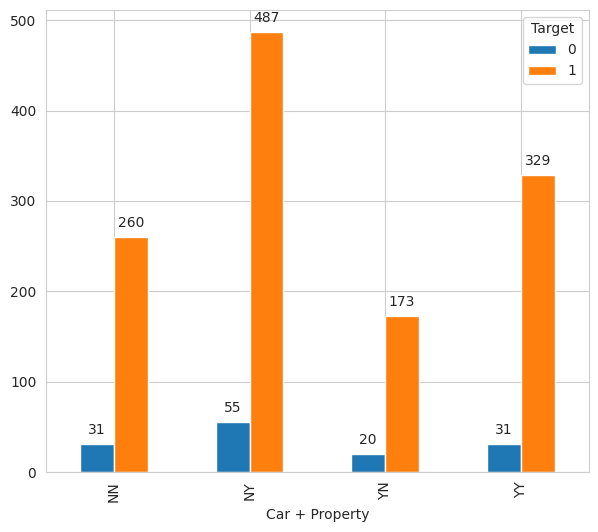

In [ ]:
#plot of the contigency table to visualize the relation between credit card approval vs assets(car + Property)
contingency_table = pd.crosstab(df_clean['Car_Owner'] + df_clean['Property_Owner'], df_clean['Target'])
contingency_table=contingency_table.rename_axis('Car + Property')
ax=contingency_table.plot(kind='bar',figsize=(7,6))
for p in ax.patches:
      height = p.get_height()
      ax.annotate(format(height), (p.get_x() + p.get_width() / 2., height),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


**Null hypothesis(H0):** There is no significant difference in the likelihood of getting a credit card between clients who own assets and those who don't.

**Alternative hypothesis(H1)**: Clients who own a car or property are more likely to get the credit card than clients who don't own any assets.

In [ ]:
# Calculate the chi-square test statistic and p-value
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('p-value:', p_val)

Chi-square statistic: 0.9399094600707959
p-value: 0.815787598040387


**Inference:**
> The p-value is greater than the significance level of 0.05, indicating that we fail to reject the null hypothesis that there is no significant difference. Therefore, we cannot conclude that credit card approval depends on assets of the clients

> **Fail to reject H0**

###***Q3. Is there any association between education level and getting credit card ?***



In [ ]:
contingency_table_normalize = pd.crosstab(df_clean['Education'], df_clean['Target'],normalize='index')*100
contingency_table_normalize.round(2)

Target                 0       1
Education                       
Academic degree     0.00  100.00
Higher education   11.50   88.50
Incomplete higher   4.92   95.08
Lower secondary    27.78   72.22
Secondary           9.24   90.76

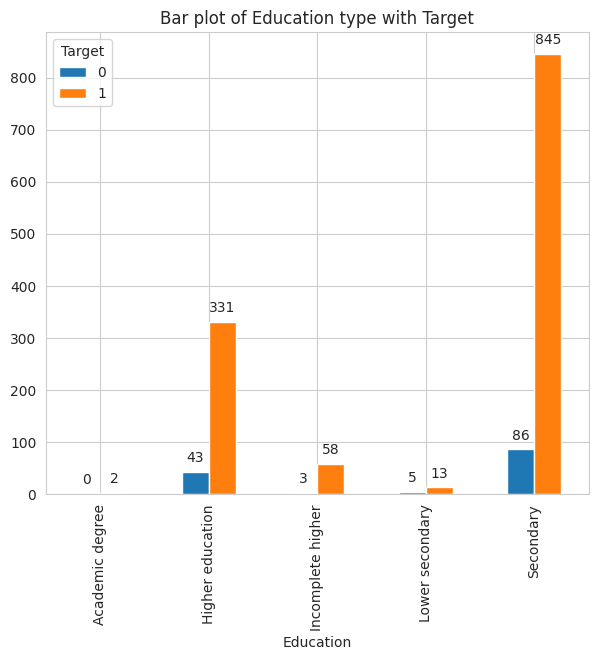

In [ ]:
contingency_table = pd.crosstab(df_clean['Education'], df_clean['Target'])
ax=contingency_table.plot(kind='bar',figsize=(7,6))
for p in ax.patches:
      height = p.get_height()
      ax.annotate(format(height), (p.get_x() + p.get_width() / 2., height),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Bar plot of Education type with Target')
plt.show()

From the contigency table and barplot we can see that: Higher the education more likely to get credit card

**Null Hypothesis (H0):** There is no association between education level and credit card approval.

**Alternative Hypothesis (H1):** There is a significant association between education level and credit card approval.

chi square test

In [ ]:

# Calculate the chi-square test statistic and p-value
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('p-value:', p_val)

Chi-square statistic: 9.90825401743187
p-value: 0.04200181637173573


**Inference:**
>In this case, the chi-square test statistic is 9.908 and the p-value is 0.042. Since the p-value is less than the standard significance level of 0.05, we can *reject the null hypothesis(H0)* and conclude that there is a significant association between education level and credit card approval. Specifically, we can say that individuals with incomplete higher education are less likely to be approved for a credit card compared to individuals with higher education or secondary education.

> **H0 Rejected**






###***Q4: Is there any association between the number of employed years and the likelihood of getting a credit card?***



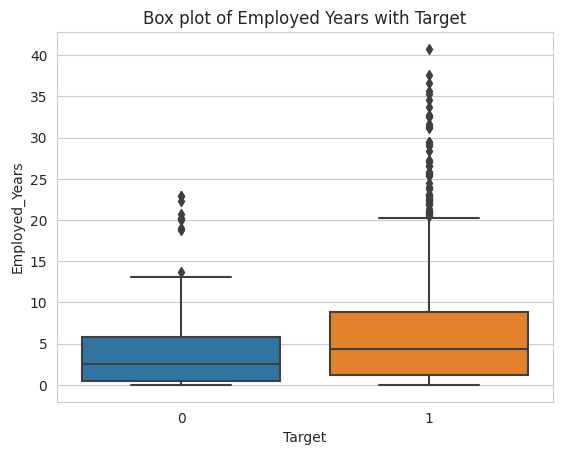

In [ ]:
sns.boxplot(df_plot, x= 'Target', y='Employed_Years')
plt.title('Box plot of Employed Years with Target')
plt.show()

From the boxplot we can see that applicants who are employeed for long times  has  more probablity to get credit cards.


**Null Hypothesis (H0**): There is no association between employed days and getting a credit card.

**Alternative Hypothesis (H1)**: There is a significant association between employed days and getting a credit card.

**pearson's correlation test**

In [ ]:
corr, p_val = stats.pearsonr(df_clean['Employed_Years'], df_clean['Target'])

# Print the correlation coefficient and p-value
print('Correlation coefficient:', corr)
print('p-value:', p_val)

Correlation coefficient: 0.08385934409825646
p-value: 0.0017799277191500225


**t-test**

In [ ]:
# Split the data into two groups based on the label variable (i.e., who gets the credit card)
credit = df_clean[df_clean['Target'] == 1]
no_credit = df_clean[df_clean['Target'] == 0]

# Compare the mean Employed duration between the two groups using a t-test
t_stat, p_val = stats.ttest_ind(credit['Employed_Years'], no_credit['Employed_Years'], equal_var=False)
print('t-statistic:', t_stat)
print('p-value:', p_val)

t-statistic: 3.3631795432351628
p-value: 0.000947945646117207


**Inference:**
>Based on the results of the hypothesis testing, we can reject the null hypothesis and conclude that there is a significant association between employed days and getting a credit card.
>>**H0 is rejected**

The correlation coefficient of 0.084 suggests that there is a weak association between employed days and credit card approval rates. In other words, **individuals who have been employed for a longer period of time are slightly more likely to be approved for a credit card.**

The p-value of 0.0018 from the correlation test and 0.00095 from the t-test suggest that these results are statistically significant. This means that we can be confident that the observed association is not due to random chance, and that there is a real relationship between employed days and credit card approval rates.

###***Q5:"Is there any evidence to suggest that credit card approval rates vary significantly between different age groups of individuals?"***

**Null Hypothesis (H0):**There is no significant difference in credit card approval rates between individuals of different ages.

**Alternative Hypothesis (H1)**: Older individuals are more likely to have their credit card applications approved than younger individuals.


In [ ]:
# Split the dataset into approved and rejected groups
approved = df_clean[df_clean['Target'] == 1]
rejected = df_clean[df_clean['Target'] == 0]

# Calculate the average ages for each group
avg_age_approved = approved['Age'].mean()
avg_age_rejected = rejected['Age'].mean()

# Perform a t-test to compare the two groups
t, p = stats.ttest_ind(approved['Age'], rejected['Age'])

# Print the results
print('Average age of approved applications:', avg_age_approved)
print('Average age of rejected applications:', avg_age_rejected)
print('t-value:', t)
print('p-value:', p)

Average age of approved applications: 43.691552273148346
Average age of rejected applications: 45.608711936225
t-value: -1.861408407979148
p-value: 0.06289839464647493


**Inference:**
>Based on the  t-value of -1.861 and p-value of 0.063, we cannot reject the null hypothesis at the conventional significance level of 0.05. This means that there is insufficient evidence to suggest that credit card approval rates vary significantly between different age groups of individuals.

 > **Failed to reject H0**

However, we should also note that the p-value is close to the significance level, which suggests that there may be a small effect of age on credit card approval rates that is not statistically significant in the current sample. Further research with a larger sample size or different data sources may be needed to confirm or refute this possibility.

>


###***Q6:Is there any association between income type and getting credit card ?***

**Null hypothesis(H0):** There is no association between type of income and getting a credit card.

**Alternative hypothesis(H1):** There is a statistically significant association between type of income and getting a credit card.

In [ ]:
contingency_table_normalize = pd.crosstab(df_clean['Income_Type'], df_clean['Target'],normalize='index')*100
contingency_table_normalize.round(2)

Target                    0      1
Income_Type                       
Commercial associate  12.42  87.58
Pensioner             14.29  85.71
State servant          4.95  95.05
Working                7.89  92.11

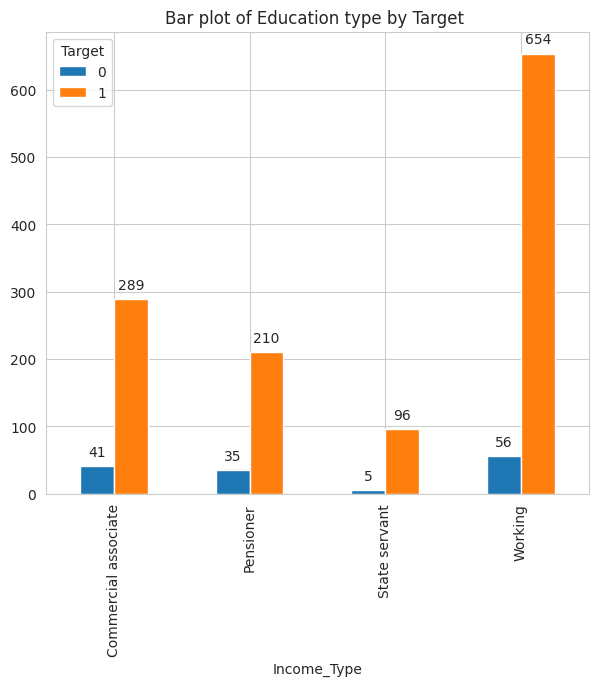

In [ ]:
contingency_table = pd.crosstab(df_clean['Income_Type'], df_clean['Target'])
ax=contingency_table.plot(kind='bar',figsize=(7,6))
for p in ax.patches:
      height = p.get_height()
      ax.annotate(format(height), (p.get_x() + p.get_width() / 2., height),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Bar plot of Education type by Target ')
plt.show()

In [ ]:

print('contigency table of income type and target\n',pd.DataFrame(contingency_table))

# Calculate the chi-square test statistic and p-value
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print('\n\nChi-square statistic:', chi2)
print('p-value:', p_val)

contigency table of income type and target
 Target                 0    1
Income_Type                  
Commercial associate  41  289
Pensioner             35  210
State servant          5   96
Working               56  654


Chi-square statistic: 13.657215976776225
p-value: 0.003410893118711459


**Inference:**
>The chi-square test statistic is 13.66 and the p-value is 0.0034. Since the p-value is less than the standard significance level of 0.05, we can reject the null hypothesis(H0) and conclude that there is a significant association between Income Type  and credit card approval.

 > **H0 is Rejected**

###***Q7:How types of occupations associated with credti card approvals***

In [ ]:
contingency_table_normalize = pd.crosstab(df_clean['Occupation_Type'], df_clean['Target'],normalize='index')*100
contingency_table_normalize.round(2).sort_values(by=0)


Target                      0       1
Occupation_Type                      
HR staff                 0.00  100.00
Secretaries              0.00  100.00
Private service staff    0.00  100.00
Realty agents            0.00  100.00
Medicine staff           6.98   93.02
Sales staff              7.21   92.79
Drivers                  7.79   92.21
Others                   8.96   91.04
Laborers                 9.17   90.83
Managers                 9.48   90.52
Cleaning staff          10.00   90.00
High skill tech staff   10.17   89.83
Core staff              10.32   89.68
Retired                 11.81   88.19
Accountants             12.20   87.80
Cooking staff           15.00   85.00
Waiters                 20.00   80.00
Low-skill Laborers      22.22   77.78
Security staff          23.81   76.19
IT staff               100.00    0.00

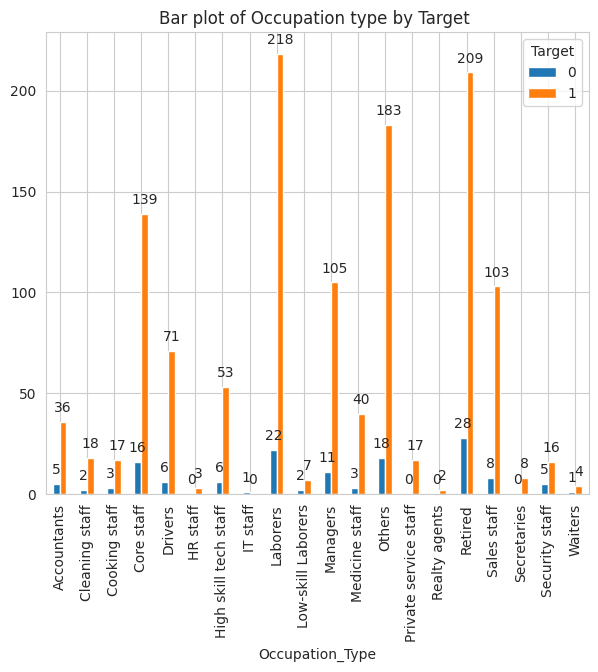

In [ ]:
contingency_table = pd.crosstab(df_clean['Occupation_Type'], df_clean['Target'])
ax=contingency_table.plot(kind='bar',figsize=(7,6))
for p in ax.patches:
      height = p.get_height()
      ax.annotate(format(height), (p.get_x() + p.get_width() / 2., height),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Bar plot of Occupation type by Target ')
plt.show()

**Null Hypothesis(H0)**: There is no significant association between type of occupation and credit card approval

**Alternative Hypothesi(H1):**There is a significant association  between ocupation type and getting credit card

In [ ]:
# Calculate the chi-square test statistic and p-value
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('p-value:', p_val)

Chi-square statistic: 22.98902475192902
p-value: 0.23782555776388017


**Inference:**
> The p-value is greater than the significance level of 0.05, indicating that we fail to reject the null hypothesis. Therefore, we cannot conclude that credit card approval depends on occupation type of the clients

> **Fail to reject H0**

#Features Engeneering

##Encoding

**Separating Features and Targate Data**

In [ ]:
X_encode=df_clean.drop('Target',axis=1)
y=df_clean['Target'].copy()

In [ ]:
X_encoding=X_encode.copy(deep=True)

The Categoty Encoder module is used to encode catgorical features the data

In [ ]:
encoder = ce.TargetEncoder(cols=["Income_Type", "Education", "Marital_Status", "Housing_Type", "Occupation_Type"], smoothing=0.2)
X_encoding = encoder.fit_transform(X_encoding,y)

In [ ]:
#Label Encoding is applied to the Binary Columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_encoding['Sex']=le.fit_transform(X_encoding['Sex'])
X_encoding['Car_Owner']=le.fit_transform(X_encoding['Car_Owner'])
X_encoding['Property_Owner']=le.fit_transform(X_encoding['Property_Owner'])

In [ ]:
X_encoding

Sex  Car_Owner  Property_Owner  Children  Annual_Income  Income_Type  \
0       1          1               1         0      12.100718     0.857143   
1       0          1               0         0      12.660331     0.875758   
2       0          1               0         0      12.660331     0.875758   
3       0          1               0         0      11.995358     0.875758   
5       0          1               0         0      12.660331     0.857143   
...   ...        ...             ...       ...            ...          ...   
1542    1          1               0         1      12.793862     0.950495   
1543    0          0               1         0      11.995358     0.875758   
1544    0          0               0         0      12.323860     0.875758   
1546    1          1               0         0      12.506181     0.921127   
1547    0          1               1         0      12.323860     0.921127   

      Education  Marital_Status  Housing_Type  Work_Phone  Phone  Email_ID  \
0      0.885027        0.907447      0.905109           0      0         0   
1      0.885027        0.907447      0.905109           1      1         0   
2      0.885027        0.907447      0.905109           1      1         0   
3      0.885027        0.907447      0.905109           1      1         0   
5      0.885027        0.907447      0.905109           1      1         0   
...         ...             ...           ...         ...    ...       ...   
1542   0.907626        0.907447      0.905109           0      1         0   
1543   0.885027        0.907447      0.905109           0      0         0   
1544   0.950820        0.861386      0.905109           0      0         0   
1546   0.907626        0.956989      0.905109           1      1         0   
1547   0.885027        0.907447      0.905109           0      0         0   

      Occupation_Type  Family_Members        Age  Employed_Years  
0            0.881857               2  51.395920        0.000000  
1            0.910448               2  37.117754        1.266654  
2            0.910448               2  42.742777        1.266654  
3            0.910448               2  37.117754        1.266654  
5            0.910448               2  37.117754        1.266654  
...               ...             ...        ...             ...  
1542         0.922078               3  30.921879        3.111467  
1543         0.905172               2  32.737109        2.444198  
1544         0.878049               1  28.006012        1.819375  
1546         0.922078               2  41.868017        1.328890  
1547         0.910448               2  45.451932        2.797797  

[1386 rows x 16 columns]

In [ ]:

X=X_encoding.copy(deep=True)

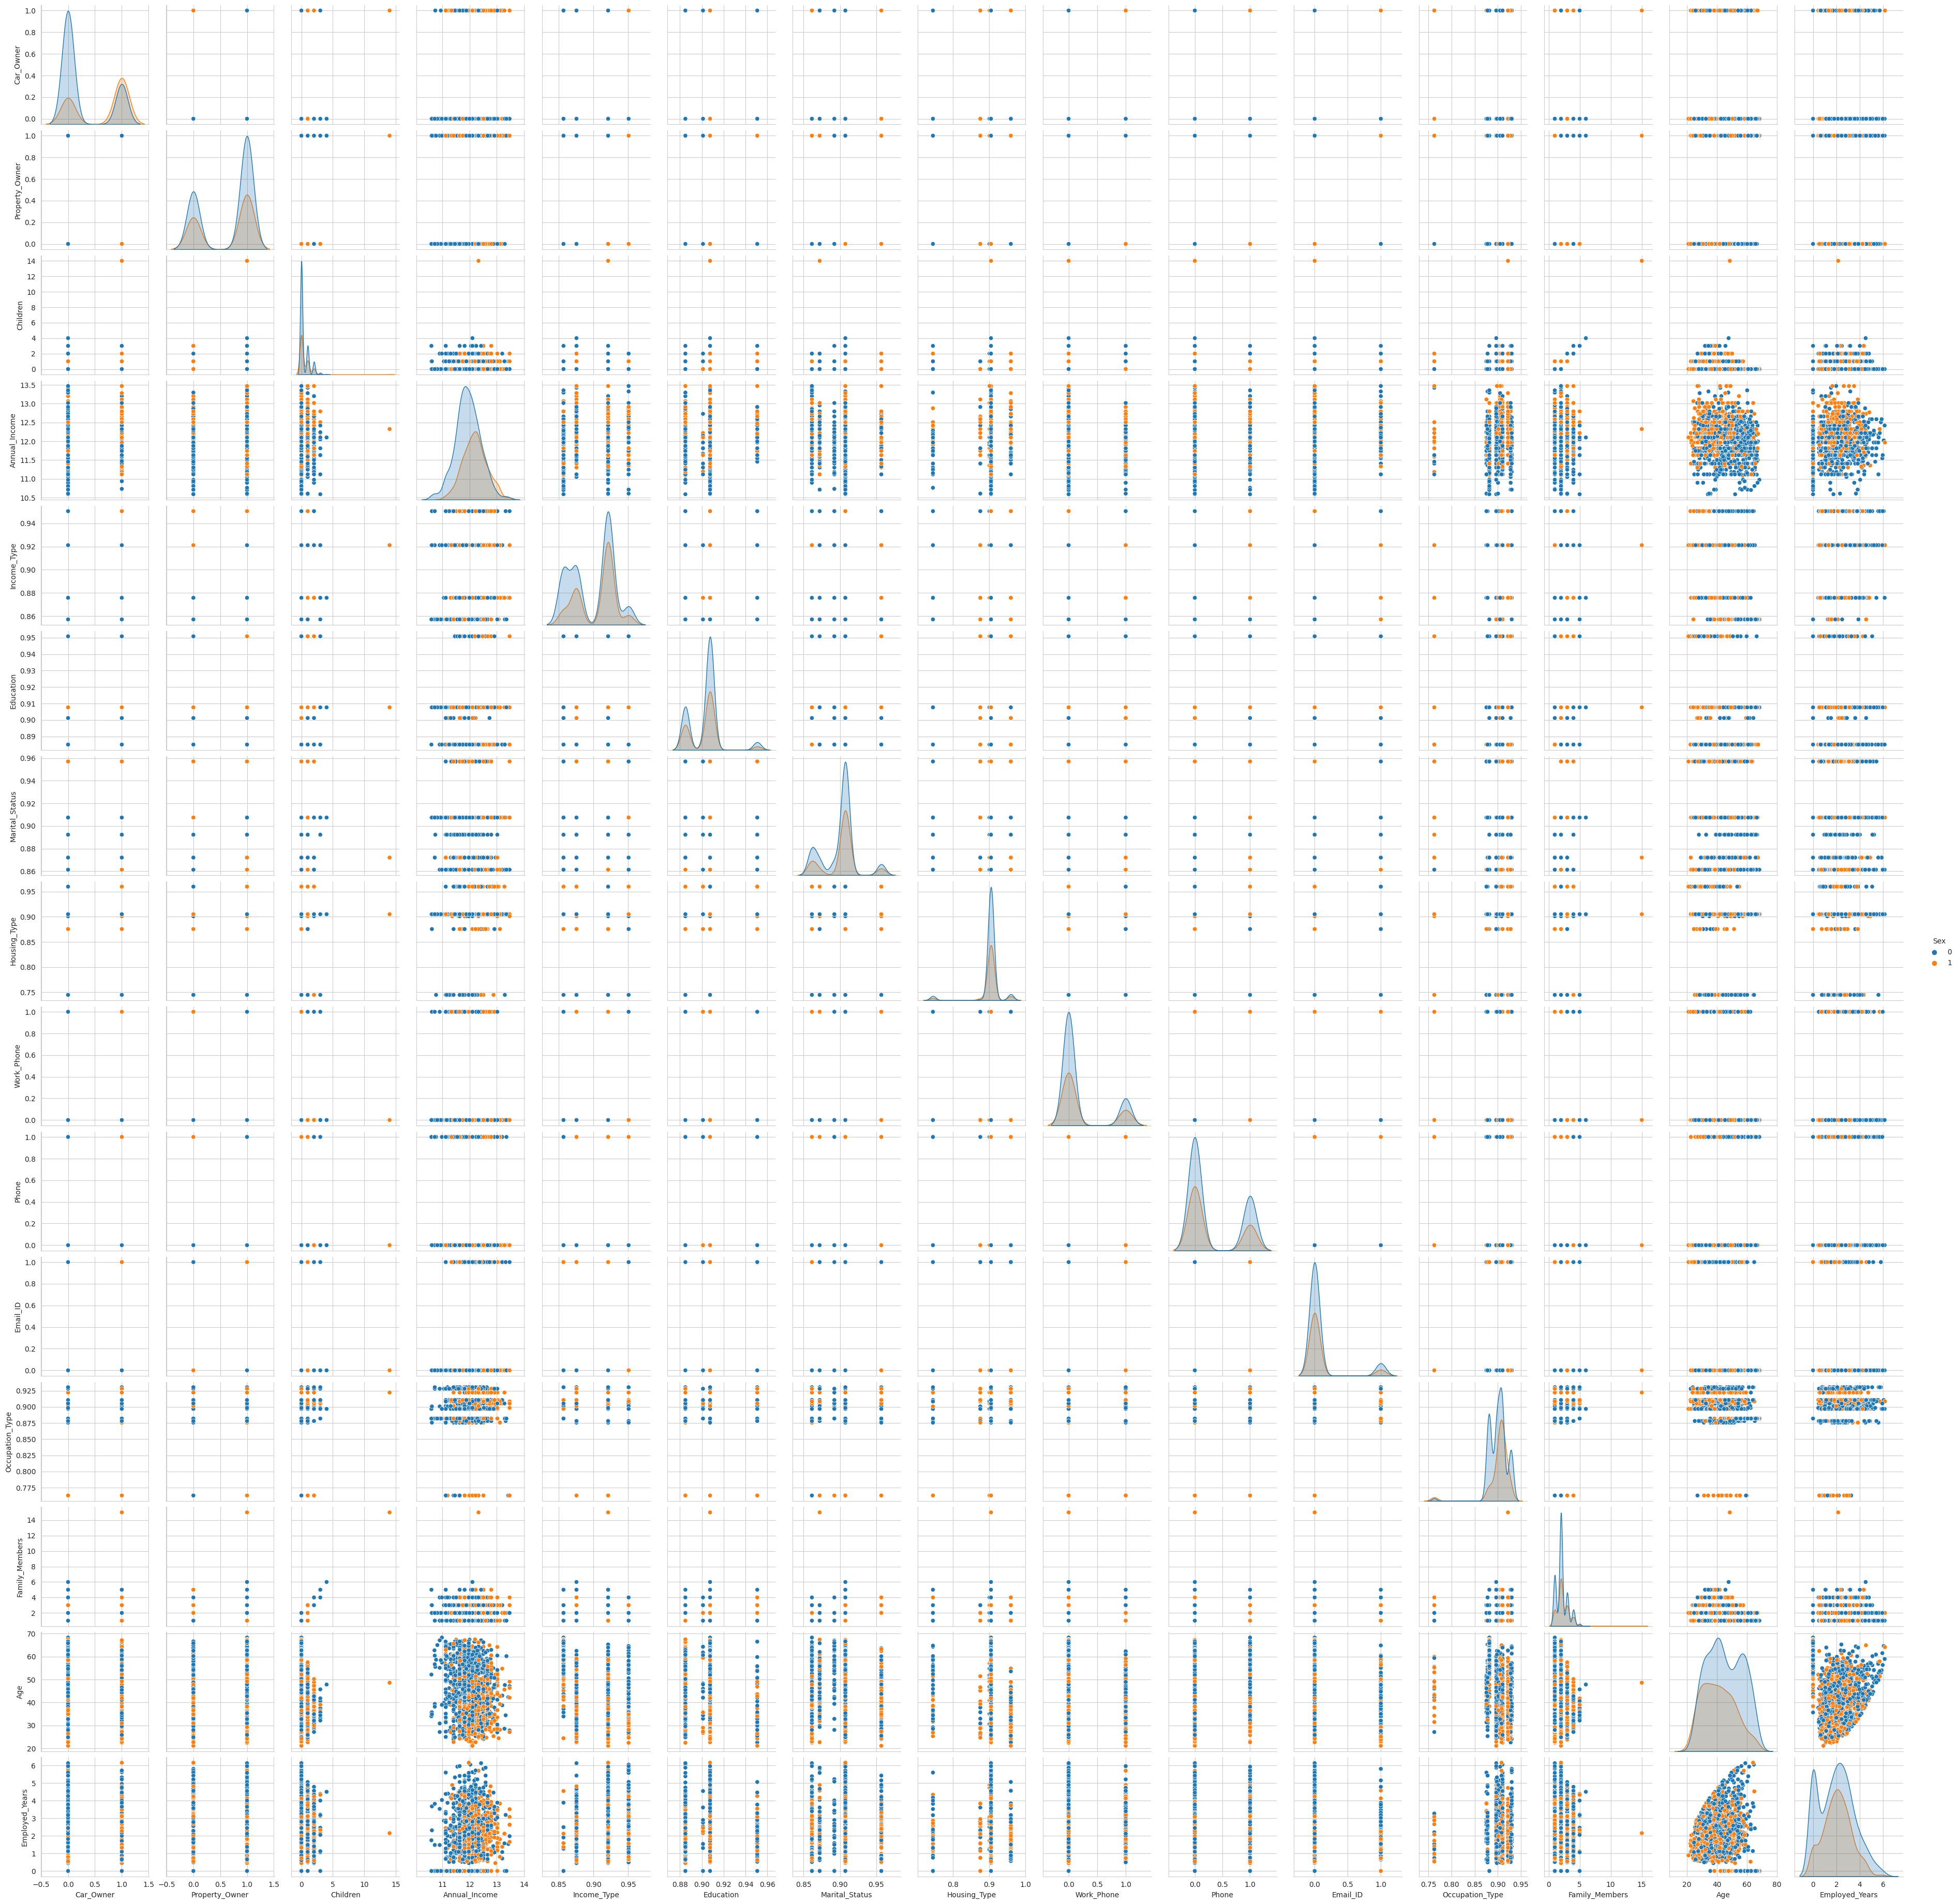

In [ ]:
sns.pairplot(X,hue='Sex')

##Balancing the imbalance data set to train the model

In [ ]:
y.value_counts()


1    1249
0     137
Name: Target, dtype: int64

The data set is highly imbalanced. After cleaning the data set we have 1249 are apporved and137 are rejected applicants out of 1386 records.Imbalance data set will produce bias in mechine learning model To balance the data we are going to use synthetic data using imblearn library







In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X, y)

In [ ]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1241, 1: 1241})


In [ ]:
X_res

Sex  Car_Owner  Property_Owner  Children  Annual_Income  Income_Type  \
0       1          1               1         0      12.100718     0.857143   
1       0          1               0         0      12.660331     0.875758   
2       0          1               0         0      12.660331     0.875758   
3       0          1               0         0      11.995358     0.875758   
4       0          1               0         0      12.660331     0.857143   
...   ...        ...             ...       ...            ...          ...   
2477    0          0               0         0      11.670939     0.944016   
2478    0          0               0         0      12.261956     0.921127   
2479    0          1               1         0      12.048550     0.887750   
2480    0          0               0         0      11.813707     0.875833   
2481    0          0               0         1      11.421001     0.945496   

      Education  Marital_Status  Housing_Type  Work_Phone  Phone  Email_ID  \
0      0.885027        0.907447      0.905109           0      0         0   
1      0.885027        0.907447      0.905109           1      1         0   
2      0.885027        0.907447      0.905109           1      1         0   
3      0.885027        0.907447      0.905109           1      1         0   
4      0.885027        0.907447      0.905109           1      1         0   
...         ...             ...           ...         ...    ...       ...   
2477   0.907626        0.871548      0.905109           0      0         0   
2478   0.924980        0.907447      0.893244           0      0         0   
2479   0.907626        0.907447      0.905109           0      1         0   
2480   0.907589        0.907371      0.905109           0      0         0   
2481   0.907626        0.907447      0.755411           0      0         0   

      Occupation_Type  Family_Members        Age  Employed_Years  
0            0.881857               2  51.395920        0.000000  
1            0.910448               2  37.117754        1.266654  
2            0.910448               2  42.742777        1.266654  
3            0.910448               2  37.117754        1.266654  
4            0.910448               2  37.117754        1.266654  
...               ...             ...        ...             ...  
2477         0.886947               2  55.647438        2.089146  
2478         0.903184               2  30.662848        2.705645  
2479         0.899675               2  52.336456        1.817700  
2480         0.910448               1  37.179980        2.657017  
2481         0.896877               3  41.008356        4.292870  

[2482 rows x 16 columns]

<Axes: >

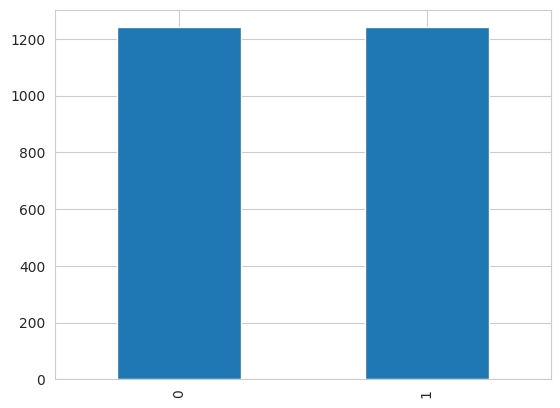

In [ ]:
y_res.value_counts().plot(kind='bar')

##Features Selection

To select the features we need to check the correlation between them

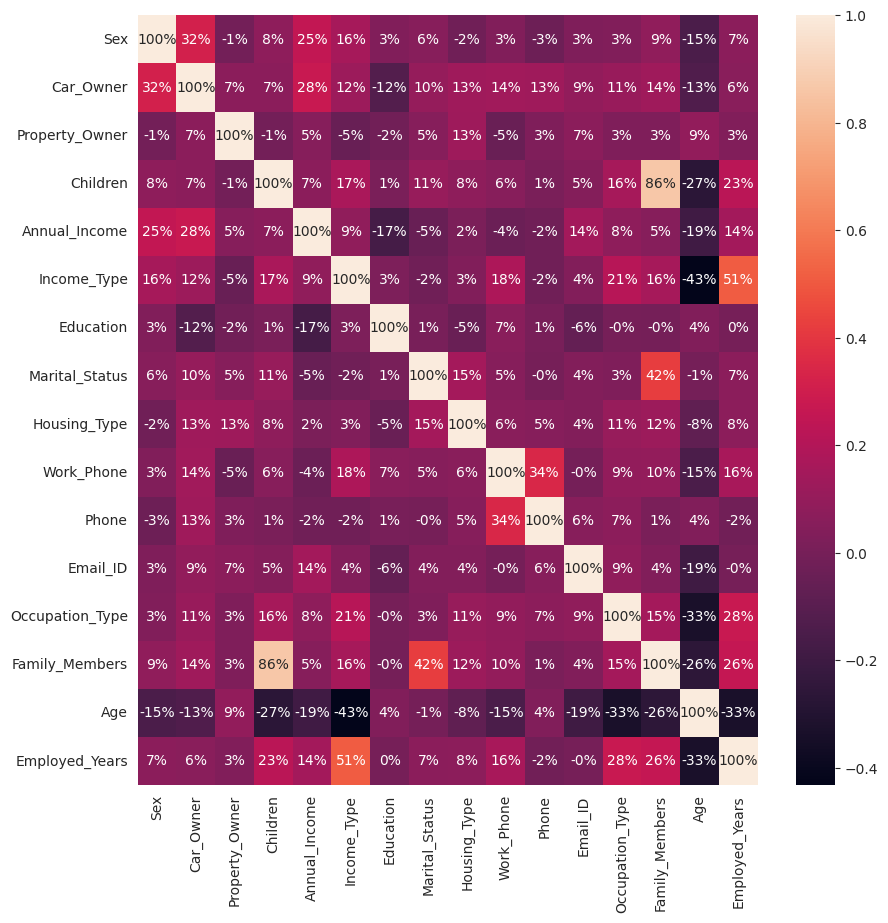

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(X_res.corr(method='pearson'), annot=True, fmt='.0%')
plt.show()

##Train Test Split

**Split the dataset in Train data and Test data in 7:3 ratio**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X_res,y_res,test_size=0.3, random_state=3)

##Feature Scaling

For scaling the data Standard Scalar is used
because  when the data follows Standatd Distrobution some ML model works better like Logistic Regrassion, KNN, SVM classifier

In [ ]:
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 # Don't cheat - fit only on training data
 scaler.fit(X_train)
 X_train = scaler.transform(X_train)
 # apply same transformation to test data
 X_test = scaler.transform(X_test)

#Machine Learning





This is a 'Classification Problem'. Here we have to choose whether an applicants is eligible for 'CreditCard' or not on the basis of his/her demographic and other informations i.e. we have to calssify the applicants  by the information provide by them and predict their eligiblity by using machine learning modles.

A good machine learning model will help the banks and credit card companies to choose a  good risk free client.


All the ML Models and Score checking modules are imported from Sklearn library

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn .naive_bayes import CategoricalNB
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report

1.   model1=Decesion Tree Classifier
2.   model2=Random Forest Classifier
3. model3= Logistic Regrassion
4. model4= SVM Classifier
5. model5=NaiveBayes Classifier
6. model6=XGBoost Classifier



In [ ]:

model1=DecisionTreeClassifier( )

model2=RandomForestClassifier( )

model3=LogisticRegression()
model4=SVC()
model5=CategoricalNB()
model6=XGBClassifier()


##DECISION TREE CLASSIFIER

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=47)
#Decision Tree parameters for Hyper Parameters Tuning by using Random Search CV
dt_params_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

dt_random = RandomizedSearchCV(estimator = model1,
                               param_distributions = dt_params_grid,
                               scoring='accuracy',
                               n_iter = 10,
                               cv = cv,
                               verbose=2,
                               random_state=47,
                               n_jobs = 1)

dt_random.fit(X_train,y_train)

In [ ]:
print('Best Parameters: ',dt_random.best_params_)
print('\n')
print('Best Score: ',dt_random.best_score_)

Best Parameters:  {'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'entropy'}


Best Score:  0.8605098221602109


In [ ]:
#Predction of the Test data
y_predict_dt =dt_random.predict(X_test)

#Confusin matrix
print(confusion_matrix(y_test,y_predict_dt))
print('\n')
# the accuracy score, F_1 score , Recall
print(classification_report(y_test,y_predict_dt))

[[323  51]
 [ 61 310]]


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       374
           1       0.86      0.84      0.85       371

    accuracy                           0.85       745
   macro avg       0.85      0.85      0.85       745
weighted avg       0.85      0.85      0.85       745



##RANDOM FOREST CLASSIFIER

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)
# Random Forest Parameters for Hyper Parameters Tuning by using Random Search CV
#criterion
criterion= ["gini", "entropy"]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
rf_params_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': ["gini", "entropy"]}

rf_random = RandomizedSearchCV(estimator = model2,
                               param_distributions = rf_params_grid,
                               scoring='accuracy',
                               n_iter = 10,
                               cv = cv,
                               verbose=2,
                               random_state=7,
                               n_jobs = 1)

rf_random.fit(X_train,y_train)

In [ ]:
print(rf_random.best_params_)
print('\n')
print(rf_random.best_score_)

{'n_estimators': 900, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}


0.9406985988273874


In [ ]:
#Predction of the Test data
y_predict_rf =rf_random.predict(X_test)

#Confusin matrix
print(confusion_matrix(y_test,y_predict_rf))
print('\n')
# the accuracy score, F_1 score , Recall
print(classification_report(y_test,y_predict_rf))

[[347  27]
 [ 14 357]]


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       374
           1       0.93      0.96      0.95       371

    accuracy                           0.94       745
   macro avg       0.95      0.95      0.94       745
weighted avg       0.95      0.94      0.94       745



##LOGISTIC REGRASSION CLASSIFIRE

In [ ]:
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=53)

lr_params_grid={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
# define search
lr_random= RandomizedSearchCV(model3, lr_params_grid,
                              n_iter=10,
                              scoring='accuracy',
                              n_jobs=1,
                              cv=cv,
                              verbose=2,
                              random_state=59)
lr_random.fit(X_train,y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
[CV] END ...C=100, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=100, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=100, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=100, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=100, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=100, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=100, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=100, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=100, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=100, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=100, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=100, max_iter=5000, penalty=none

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=53),
                   estimator=LogisticRegression(), n_jobs=1,
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100],
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=59, scoring='accuracy', verbose=2)

In [ ]:
print('Best Parameters: ',lr_random.best_params_)
print('\n')
print('Best Score: ',lr_random.best_score_)

Best Parameters:  {'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 5000, 'C': 100}


Best Score:  0.6764544991473437


In [ ]:
#Predction of the Test data
y_predict_lr=lr_random.predict(X_test)

#Confusin matrix
print(confusion_matrix(y_test,y_predict_lr))
print('\n')
# the accuracy score, F_1 score , Recall
print(classification_report(y_test,y_predict_lr))

[[262 112]
 [142 229]]


              precision    recall  f1-score   support

           0       0.65      0.70      0.67       374
           1       0.67      0.62      0.64       371

    accuracy                           0.66       745
   macro avg       0.66      0.66      0.66       745
weighted avg       0.66      0.66      0.66       745



##SVM CLASSIFIER

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=37)
#SVM Classifier Parameter Grid for HyperParameters Tuning by using Random Search CV
svm_params_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svm_random = RandomizedSearchCV(estimator = model4,
                                param_distributions = svm_params_grid,
                                scoring='accuracy',
                                n_iter = 10,
                                cv = 10,
                                verbose=2,
                                random_state=41,
                                n_jobs = 1)
#fitting the Train data into the model
svm_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END ....................C=100, gamma=0.00

RandomizedSearchCV(cv=10, estimator=SVC(), n_jobs=1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   random_state=41, scoring='accuracy', verbose=2)

In [ ]:
print('Best Parameters: ',svm_random.best_params_)
print('\n')
print('Best Score: ',svm_random.best_score_)

Best Parameters:  {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}


Best Score:  0.8733705401634442


In [ ]:
#Predction of the Test data
y_predict_svm=svm_random.predict(X_test)

#Confusin matrix
print(confusion_matrix(y_test,y_predict_svm))
print('\n')
# the accuracy score, F_1 score , Recall
print(classification_report(y_test,y_predict_svm))

[[338  36]
 [ 69 302]]


              precision    recall  f1-score   support

           0       0.83      0.90      0.87       374
           1       0.89      0.81      0.85       371

    accuracy                           0.86       745
   macro avg       0.86      0.86      0.86       745
weighted avg       0.86      0.86      0.86       745



##NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X_res,y_res,test_size=0.3, random_state=3)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
sclr= MaxAbsScaler()
sclr.fit(X_train)
X_train=sclr.transform(X_train)
X_test=sclr.transform(X_test)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=37)
#SVM Classifier Parameter Grid for HyperParameters Tuning by using Random Search CV
nbc_params_grid = {'alpha':[0.001, 0.01, 0.1, 1]}
nbc_random = RandomizedSearchCV(estimator = model5,
                                param_distributions = nbc_params_grid,
                                scoring='accuracy',

                                n_iter = 5,
                                cv = cv,
                                verbose=2,
                                random_state=41,
                                n_jobs = 1)
#fitting the Train data into the model
nbc_random.fit(X_train,y_train)

Fitting 15 folds for each of 4 candidates, totalling 60 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .......................................

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=37),
                   estimator=CategoricalNB(), n_iter=5, n_jobs=1,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1]},
                   random_state=41, scoring='accuracy', verbose=2)

In [ ]:
print('Best Parameters: ',nbc_random.best_params_)
print('\n')
print('Best Score: ',nbc_random.best_score_)

Best Parameters:  {'alpha': 0.001}


Best Score:  nan


In [ ]:
#Predction of the Test data
y_predict_nbc=nbc_random.predict(X_test)

#Confusin matrix
print(confusion_matrix(y_test,y_predict_nbc))
print('\n')
# the accuracy score, F_1 score , Recall
print(classification_report(y_test,y_predict_nbc))

[[291  83]
 [152 219]]


              precision    recall  f1-score   support

           0       0.66      0.78      0.71       374
           1       0.73      0.59      0.65       371

    accuracy                           0.68       745
   macro avg       0.69      0.68      0.68       745
weighted avg       0.69      0.68      0.68       745



##XGBOOST CLASSSIFIER

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=37)
xgb_params_grid = {
   'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
            'max_depth':range(3,10,2),
            'min_child_weight':range(1,6,2),
             'gamma':[i/10.0 for i in range(0,5)],
              'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
             }
xgb_random = RandomizedSearchCV(estimator = model6,
                                param_distributions = xgb_params_grid,
                                scoring='accuracy',

                                n_iter = 5,
                                cv = cv,
                                verbose=2,
                                random_state=41,
                                n_jobs = 1)
#fitting the Train data into the model
xgb_random.fit(X_train,y_train)

Fitting 15 folds for each of 5 candidates, totalling 75 fits
[CV] END colsample_bytree=0.7, gamma=0.3, max_depth=5, min_child_weight=1, reg_alpha=0.001, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.3, max_depth=5, min_child_weight=1, reg_alpha=0.001, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.3, max_depth=5, min_child_weight=1, reg_alpha=0.001, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.3, max_depth=5, min_child_weight=1, reg_alpha=0.001, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.3, max_depth=5, min_child_weight=1, reg_alpha=0.001, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.3, max_depth=5, min_child_weight=1, reg_alpha=0.001, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.3, max_depth=5, min_child_weight=1, reg_alpha=0.001, subsample=0.6; total time=   2.0s
[CV] END colsample_bytree=0.7, gamma=0.3, max_depth=5, mi

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=37),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           i...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_depth': range(3, 10, 2),
                                        'min_child_weight': range(1, 6, 2),
                                        'reg_alpha': [0, 0.001, 0.005, 0.01,
                                                      0.05],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   random_state=41, scoring='accuracy', verbose=2)

In [ ]:
print('Best Parameters: ',xgb_random.best_params_)
print('\n')
print('Best Score: ',xgb_random.best_score_)

Best Parameters:  {'subsample': 0.9, 'reg_alpha': 0.005, 'min_child_weight': 3, 'max_depth': 9, 'gamma': 0.3, 'colsample_bytree': 0.6}


Best Score:  0.935515143484934


In [ ]:
#Predction of the Test data
y_predict_xgb=xgb_random.predict(X_test)

#Confusin matrix
print(confusion_matrix(y_test,y_predict_xgb))
print('\n')
# the accuracy score, F_1 score , Recall
print(classification_report(y_test,y_predict_xgb))

[[347  27]
 [ 31 340]]


              precision    recall  f1-score   support

           0       0.92      0.93      0.92       374
           1       0.93      0.92      0.92       371

    accuracy                           0.92       745
   macro avg       0.92      0.92      0.92       745
weighted avg       0.92      0.92      0.92       745



##Model Selection

In [ ]:
model_scores={
    'Models':['Decesion Tree Classifier', 'Random Forest Classifier',
                        'Logistic Regrassion', 'SVM Classifier',
                            'XGBoost Classifier'],

'Accuracy_Score_On_Train_Data':[0.86,0.94,0.67,0.87,0.93],

'Accuracy_Score_on_Test_Data':[0.85,0.95,0.66,0.86,0.92],

'Best Parameters':["'min_samples_leaf' : 5, 'max_depth': 10, 'criterion': 'entropy'",
"'n_estimators': 900, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'",
"'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 5000, 'C': 100",
"'kernel': 'rbf', 'gamma': 0.1, 'C': 10",
"'subsample': 0.9, 'reg_alpha': 0.005, 'min_child_weight': 3, 'max_depth': 9, 'gamma': 0.3, 'colsample_bytree': 0.6",
]
}
model_table=pd.DataFrame(model_scores)
model_table

Models  Accuracy_Score_On_Train_Data  \
0  Decesion Tree Classifier                          0.86   
1  Random Forest Classifier                          0.94   
2       Logistic Regrassion                          0.67   
3            SVM Classifier                          0.87   
4        XGBoost Classifier                          0.93   

   Accuracy_Score_on_Test_Data  \
0                         0.85   
1                         0.95   
2                         0.66   
3                         0.86   
4                         0.92   

                                     Best Parameters  
0  'min_samples_leaf' : 5, 'max_depth': 10, 'crit...  
1  'n_estimators': 900, 'min_samples_split': 5, '...  
2  'solver': 'lbfgs', 'penalty': 'none', 'max_ite...  
3             'kernel': 'rbf', 'gamma': 0.1, 'C': 10  
4  'subsample': 0.9, 'reg_alpha': 0.005, 'min_chi...

From the above models **Random Forest Classifier** perform best with **95%** accuracy on test data.

Final model is Random Forest with parameters
>> `'n_estimators': 900,
      'min_samples_split': 5,
      'min_samples_leaf': 1,
        'max_features': 'sqrt',
        'max_depth': 15,
        'criterion': 'gini'`





In [ ]:
final_model=rf_random